### Mount Drive & Set Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model

/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model


In [ ]:
path='/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model'

###Import Library & get Image from drive

In [ ]:
import os
import glob

Loop get Image with '.jpg '

In [ ]:
# Get Image names stored in "Images" folder
image_path_names=[]
person_names=set()
for file_name in glob.glob(path+'/Images/*/*.jpg*'):
  image_path_names.append(file_name)
  person_names.add(image_path_names[-1].split('/')[-1])
  #print(image_path_names[-1].split('/')[-1])

In [ ]:
print(file_name)
print(image_path_names)
print(len(image_path_names))

/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model/Images/w50/w_50_1.jpg
['/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model/Images/12/m_12_1.jpg', '/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model/Images/15/m_15_1.jpg', '/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model/Images/17/m_17_1.jpg', '/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model/Images/10/m_10_1.jpg', '/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model/Images/18/m_18_1.jpg', '/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model/Images/16/m_16_1.jpg', '/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model/Images/1/m_1_1.jpg', '/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model/Images/13/m_13_1.jpg', '/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model/Images/14/m_14_1.jpg', '/content/drive/My Drive/Colab Notebooks/Face_Recognition/VGG_Model/Images/11/m_11_1.jpg', '/

In [ ]:
print(person_names)

{'m_54_1.jpg', 'w_39_1.jpg', 'm_46_1.jpg', 'm_40_1.jpg', 'w_41_1.jpg', 'm_13_1.jpg', 'w_34_1.jpg', 'w_1_1.jpg', 'w_13_1.jpg', 'w_16_1.jpg', 'm_2_1.jpg', 'm_50_1.jpg', 'w_30_1.jpg', 'm_12_1.jpg', 'w_33_1.jpg', 'w_4_1.jpg', 'w_29_1.jpg', 'w_20_1.jpg', 'm_17_1.jpg', 'm_20_1.jpg', 'm_34_1.jpg', 'm_22_1.jpg', 'm_9_1.jpg', 'm_30_1.jpg', 'w_17_1.jpg', 'm_18_1.jpg', 'm_24_1.jpg', 'w_22_1.jpg', 'm_21_1.jpg', 'w_37_1.jpg', 'm_38_1.jpg', 'm_31_1.jpg', 'w_11_1.jpg', 'm_49_1.jpg', 'w_40_1.jpg', 'm_56_1.jpg', 'm_14_1.jpg', 'w_2_1.jpg', 'm_3_1.jpg', 'w_19_1.jpg', 'w_36_1.jpg', 'm_19_1.jpg', 'm_39_1.jpg', 'w_23_1.jpg', 'w_45_1.jpg', 'w_44_1.jpg', 'm_35_1.jpg', 'w_24_1.jpg', 'm_16_1.jpg', 'w_31_1.jpg', 'm_41_1.jpg', 'm_47_1.jpg', 'w_46_1.jpg', 'w_32_1.jpg', 'w_9_1.jpg', 'w_26_1.jpg', 'w_48_1.jpg', 'm_4_1.jpg', 'w_35_1.jpg', 'm_51_1.jpg', 'm_1_1.jpg', 'w_27_1.jpg', 'm_44_1.jpg', 'w_15_1.jpg', 'w_5_1.jpg', 'm_7_1.jpg', 'm_5_1.jpg', 'w_8_1.jpg', 'w_38_1.jpg', 'm_6_1.jpg', 'w_43_1.jpg', 'm_23_1.jpg', 'm_33

There are total images containing 56 man 51 woman || 17 images per person

There are total 60 images containing 10 images per person.

#ResNet and SeNet

In [ ]:
pip install keras_vggface

In [ ]:
pip install keras_applications

     |████████████████████████████████| 50 kB 3.6 MB/s 


In [ ]:
pip install keras_preprocessing 

 <font marquee color='lightblue'>Import ไม่ได้เปลี่ยนชื่อ Module</marquee>

In [ ]:
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))

20951

In [ ]:
from keras_vggface.vggface import VGGFace

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, concatenate
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.core import Dense, Activation, Lambda, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import model_from_json
#from tensorflow.keras.layers.merge import Concatenate
from tensorflow.keras import backend as K

from os import listdir
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

##resnet

In [ ]:
vggface = VGGFace(model='resnet50')

165453824/165439116 [==============================] - 2s 0us/step


In [ ]:
vggface.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

 <font marquee color='lightblue'>ปรับ Output Layer เป็น Flatten เพื่อให้ได้ผลลัพธ์เป็นเว็กเตอร์ 2048 มิติ</marquee>

In [ ]:
vgg_face=Model(inputs=vggface.layers[0].input,outputs=vggface.layers[-2].output)

In [ ]:
vgg_face.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                             

In [ ]:
img=load_img(path+'/Test_MTCNN_crop/1/m_1_1.jpg',target_size=(224,224,3))
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
# If you have pre-cropped images, you can skip the
# detection step.
img_encode = vgg_face(img)
img_encode

<tf.Tensor: shape=(1, 2048), dtype=float32, numpy=
array([[0.49503422, 0.02381082, 0.356475  , ..., 0.42637333, 0.        ,
        1.5243162 ]], dtype=float32)>

###Encoding

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import csv
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.DataFrame(img_encode)
df.insert(0, "image_name", "w_1_2.jpg")
df = df.iloc[1: , :]
df

,image_name,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


In [ ]:
# Get Image names stored in "Images" folder
imageEncode_path_names=[]
personEncode_names=set()
for file_name in glob.glob(path+'/Test_MTCNN_crop/*/*.jpg*'):
  imageEncode_path_names.append(file_name)
  personEncode_names.add(imageEncode_path_names[-1].split('/')[-1])
  #print(imageEncode_path_names[-1].split('/')[-1])

In [ ]:
len(imageEncode_path_names)

1800

In [ ]:
for filename in imageEncode_path_names:
  imgCSV = load_img(filename, target_size=(224,224))
  imgCSV = img_to_array(imgCSV)
  imgCSV = np.expand_dims(imgCSV,axis=0)
  imgCSV = preprocess_input(imgCSV)
  img_encodeCSV = vgg_face(imgCSV)
  img_encodeCSV = img_encodeCSV.numpy()
  df555 = pd.DataFrame(img_encodeCSV)
  df555.insert(0, "image_name", filename.split("/")[-1])
  df = pd.concat([df,df555], axis=0)
  #df.append(df555, ignore_index=True)
  print(df)

Streaming output truncated to the last 5000 lines.
     image_name         0         1         2         3          4         5  \
0    m_14_1.jpg  0.000000  3.465286  0.149579  1.300458   7.341391  1.109110   
0    m_14_2.jpg  0.000000  5.310084  0.218630  0.013728   0.267259  0.232252   
0    m_14_3.jpg  0.015080  0.048299  5.141362  0.000036   0.012400  1.426866   
0    m_14_4.jpg  0.000000  0.024231  2.633631  0.120741   4.547418  2.648678   
0    m_14_7.jpg  0.001419  0.385813  0.017747  1.997630   5.721818  2.896114   
..          ...       ...       ...       ...       ...        ...       ...   
0    w_48_8.jpg  0.000000  4.629679  0.962335  1.588712  13.187838  2.495983   
0    w_48_9.jpg  0.000000  4.392655  2.546092  0.385592  17.134272  0.499736   
0   w_48_11.jpg  0.000000  6.307321  1.373910  0.957859  14.175061  0.168600   
0   w_48_10.jpg  0.000000  5.064927  1.362651  0.694735  18.122070  0.000000   
0   w_48_13.jpg  0.000000  3.268410  0.033652  0.524398  13.700402  0

In [ ]:
df

In [ ]:
df.to_csv('resnet_encode.csv', index=False)

### Distance

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
resnet_encode = pd.read_csv(path+'/resnet_encode.csv')

In [ ]:
resnet_imgName = resnet_encode["image_name"] #เก็บชื่อรูปภาพไว้ก่อนเอาออก เพื่อจะนำไปใส่กลับไปทีหลัง
resnet_encode = resnet_encode.drop('image_name', 1) #เอา col ชื่อรูปภาพ ออกก่อน เพื่อจะนำไปคำนวนหา distance

In [ ]:
pip install scipy

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A =  resnet_encode
A_sparse = sparse.csr_matrix(A)

similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

#also can output sparse matrices
similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise dense output:
 [[1.         0.66374016 0.59552687 ... 0.40213607 0.43350971 0.35883699]
 [0.66374016 1.         0.66369551 ... 0.36070839 0.36328387 0.32576891]
 [0.59552687 0.66369551 1.         ... 0.33529383 0.3417022  0.34192664]
 ...
 [0.40213607 0.36070839 0.33529383 ... 1.         0.73875073 0.86578233]
 [0.43350971 0.36328387 0.3417022  ... 0.73875073 1.         0.75646685]
 [0.35883699 0.32576891 0.34192664 ... 0.86578233 0.75646685 1.        ]]

pairwise sparse output:
   (0, 908)	0.49334302661063767
  (0, 860)	0.5200065475148101
  (0, 772)	0.4400541054423502
  (0, 768)	0.4281832220482838
  (0, 766)	0.43585677345076285
  (0, 1795)	0.3944471554144016
  (0, 1764)	0.44833895568268195
  (0, 1755)	0.4280823180194254
  (0, 1747)	0.5394453882048067
  (0, 1645)	0.4154721950160233
  (0, 1644)	0.3900232654461709
  (0, 1612)	0.44304985994753504
  (0, 1604)	0.39647567353970825
  (0, 1599)	0.3913984537966086
  (0, 1554)	0.4030332342552662
  (0, 1522)	0.43457974876654465
  (0, 151

แปลงเป็น dataframe และนำชื่อรูปกลับมา

In [ ]:
resnet_distance = pd.DataFrame(similarities)
resnet_distance.insert(0, "image_name", resnet_imgName)

In [ ]:
resnet_distance

,image_name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,m_14_1.jpg,1.000000,0.663740,0.595527,0.806172,0.938205,0.915171,0.838217,0.885213,0.945617,0.915628,0.938081,0.927630,0.896771,0.859657,0.890664,0.844928,0.704399,0.555866,0.556174,0.489291,0.506520,0.486669,0.529096,0.552344,0.520054,0.560796,0.479187,0.489466,0.549814,0.597147,0.502605,0.501872,0.489502,0.532320,0.558497,0.603716,0.542838,0.630826,0.579666,...,0.490616,0.487076,0.450316,0.466572,0.448339,0.451963,0.391229,0.360165,0.381667,0.425369,0.404321,0.397527,0.386509,0.380481,0.395179,0.386893,0.383060,0.376306,0.390055,0.386382,0.388249,0.368431,0.362853,0.451054,0.381296,0.463333,0.419976,0.468122,0.451261,0.468774,0.417363,0.445557,0.427380,0.443410,0.426408,0.394447,0.339149,0.402136,0.433510,0.358837
1,m_14_2.jpg,0.663740,1.000000,0.663696,0.780444,0.621394,0.639982,0.736802,0.628381,0.647677,0.647916,0.633192,0.671236,0.629242,0.603011,0.606685,0.629954,0.530248,0.548670,0.531800,0.588400,0.600619,0.482928,0.615854,0.530994,0.566963,0.542396,0.488996,0.516576,0.534956,0.600003,0.540927,0.530664,0.488543,0.493308,0.443594,0.536577,0.410870,0.484048,0.521660,...,0.427540,0.448822,0.362370,0.429600,0.394881,0.412326,0.325160,0.319481,0.348479,0.391292,0.391039,0.350819,0.349495,0.335110,0.355741,0.341313,0.350400,0.320828,0.350076,0.312609,0.328170,0.320279,0.336067,0.390716,0.414866,0.423924,0.434019,0.402517,0.376316,0.384847,0.374828,0.423396,0.386984,0.401074,0.370849,0.350163,0.325469,0.360708,0.363284,0.325769
2,m_14_3.jpg,0.595527,0.663696,1.000000,0.750152,0.563282,0.604204,0.750588,0.546259,0.586745,0.577791,0.570166,0.605661,0.560954,0.565829,0.545768,0.602387,0.514242,0.555858,0.625320,0.593448,0.529738,0.485342,0.687203,0.542496,0.492889,0.485744,0.484029,0.490656,0.545147,0.526960,0.507750,0.487394,0.440353,0.494098,0.378010,0.435328,0.416746,0.477146,0.484412,...,0.420202,0.399292,0.331545,0.376466,0.390233,0.400600,0.342956,0.384897,0.338381,0.421549,0.400887,0.364272,0.358932,0.338840,0.337770,0.332409,0.349590,0.351760,0.369099,0.326132,0.316027,0.334839,0.348032,0.377267,0.344754,0.407227,0.420257,0.400667,0.368169,0.360839,0.359508,0.375124,0.347746,0.380207,0.362734,0.338510,0.325136,0.335294,0.341702,0.341927
3,m_14_4.jpg,0.806172,0.780444,0.750152,1.000000,0.757614,0.752647,0.885247,0.784955,0.784532,0.807960,0.809382,0.818565,0.776846,0.735577,0.758452,0.768592,0.633550,0.570335,0.578449,0.614610,0.602741,0.479097,0.667377,0.540088,0.540674,0.556352,0.476789,0.486248,0.544967,0.579751,0.528370,0.557031,0.489067,0.511100,0.478502,0.535898,0.469808,0.583986,0.570160,...,0.484128,0.490491,0.447859,0.465246,0.467378,0.445092,0.371566,0.362442,0.385102,0.454109,0.430472,0.385582,0.387023,0.371571,0.383520,0.379237,0.377426,0.360131,0.388316,0.359695,0.379905,0.356491,0.360954,0.485702,0.422310,0.506580,0.527768,0.499859,0.475880,0.482037,0.444753,0.487842,0.458839,0.505382,0.453166,0.416121,0.398387,0.459037,0.415871,0.413622
4,m_14_7.jpg,0.938205,0.621394,0.563282,0.757614,1.000000,0.933766,0.814176,0.811416,0.953846,0.862513,0.880079,0.853678,0.859596,0.816471,0.871045,0.827724,0.702618,0.556417,0.525062,0.479067,0.530929,0.492085,0.522738,0.558214,0.513068,0.552847,0.484227,0.487760,0.548809,0.587884,0.510226,0.507048,0.488559,0.556987,0.556991,0.575340,0.543300,0.613127,0.561260,...,0.536957,0.529094,0.498562,0.506482,0.488503,0.495475,0.395383,0.356756,0.387924,0.435919,0.403698,0.410871,0.394155,0.394544,0.399821,0.396019,0.391981,0.397088,0.401983,0.390662,0.400976,0.379202,0.380222,0.475834,0.409179,0.474404,0.437064,0.491619,0.496094,0.495899,0.460723,0.438742,0.427562,0.461459,0.458205,0.438303,0.362588,0.426528,0.439079,0.373677
...,...,...,...,...,...,...,...,...,.

เปลี่ยนชื่อให้ column

In [ ]:
resnet_distance = pd.read_csv(path+'/resnet_distance.csv')

In [ ]:
col_name = list(resnet_distance["image_name"])
col_name.insert(0, "image_name")
resnet_distance.columns = col_name
resnet_distance

,image_name,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,m_14_1.jpg,1.000000,0.663740,0.595527,0.806172,0.938205,0.915171,0.838217,0.885213,0.945617,...,0.417363,0.445557,0.427380,0.443410,0.426408,0.394447,0.339149,0.402136,0.433510,0.358837
1,m_14_2.jpg,0.663740,1.000000,0.663696,0.780444,0.621394,0.639982,0.736802,0.628381,0.647677,...,0.374828,0.423396,0.386984,0.401074,0.370849,0.350163,0.325469,0.360708,0.363284,0.325769
2,m_14_3.jpg,0.595527,0.663696,1.000000,0.750152,0.563282,0.604204,0.750588,0.546259,0.586745,...,0.359508,0.375124,0.347746,0.380207,0.362734,0.338510,0.325136,0.335294,0.341702,0.341927
3,m_14_4.jpg,0.806172,0.780444,0.750152,1.000000,0.757614,0.752647,0.885247,0.784955,0.784532,...,0.444753,0.487842,0.458839,0.505382,0.453166,0.416121,0.398387,0.459037,0.415871,0.413622
4,m_14_7.jpg,0.938205,0.621394,0.563282,0.757614,1.000000,0.933766,0.814176,0.811416,0.953846,...,0.460723,0.438742,0.427562,0.461459,0.458205,0.438303,0.362588,0.426528,0.439079,0.373677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_7_13.jpg,0.394447,0.350163,0.338510,0.416121,0.438303,0.422697,0.441092,0.375946,0.421928,...,0.926477,0.797167,0.857425,0.883176,0.948721,1.000000,0.800554,0.840808,0.802561,0.872958
1796,w_7_14.jpg,0.339149,0.325469,0.325136,0.398387,0.362588,0.355075,0.395779,0.335464,0.358474,...,0.817132,0.770401,0.799775,0.780933,0.803892,0.800554,1.000000,0.801814,0.668194,0.793140
1797,w_7_16.jpg,0.402136,0.360708,0.335294,0.459037,0.426528,0.383442,0.422658,0.439123,0.440592,...,0.860572,0.807027,0.832628,0.885728,0.848317,0.840808,0.801814,1.000000,0.738751,0.865782
1798,w_7_15.jpg,0.433510,0.363284,0.341702,0.415871,0.439079,0.426461,0.417550,0.429022,0.435084,...,0.807356,0.800494,0.803159,0.799042,0.790015,0.802561,0.668194,0.738751,1.000000,0.756467


In [ ]:
resnet_distance.to_csv('resnet_distance.csv', index=False)

###Setup FRR & FAR

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
resnet_distance = pd.read_csv(path+'/resnet_distance.csv')

In [ ]:
resnet_masking = pd.read_csv(path+'/resnet_masking.csv')
resnet_masking

,image_name,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,m_14_1.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,m_14_2.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,m_14_3.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,m_14_4.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,m_14_7.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_7_13.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1796,w_7_14.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1797,w_7_16.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1798,w_7_15.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


เริ่มทำการ FRR Masking 

*   คนเดียวกันเป็น 1
*   ไม่ใช่คนเดียวกันเป็น 0
*   รูปเดียวกัน Nan


In [ ]:
for i in range(len(resnet_masking)):
  for j in range(len(col_name)):
    if resnet_masking['image_name'][i][:4] == col_name[j][:4]:
      resnet_masking.iloc[[i],[j]] = 1 #คนเดียวกัน
      if resnet_masking['image_name'][i] == col_name[j]:
        resnet_masking.iloc[[i],[j]] = np.nan #รูปเดียวกัน

In [ ]:
resnet_masking

,image_name,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,m_14_1.jpg,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,m_14_2.jpg,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,m_14_3.jpg,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,m_14_4.jpg,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,m_14_7.jpg,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_7_13.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
1796,w_7_14.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
1797,w_7_16.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
1798,w_7_15.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0


In [ ]:
resnet_masking.to_csv('resnet_masking_complete.csv', index=False)

####FRR

ทำการ drop Column image_name ของทั้ง 2 table ออกสำหรับการทำ cross metrix

In [ ]:
resnet_distance_noImgName = resnet_distance.drop('image_name', 1)
resnet_masking_noImgName = resnet_masking.drop('image_name', 1)

In [ ]:
resnet_frr_matric = resnet_distance_noImgName.multiply(resnet_masking_noImgName)

In [ ]:
resnet_frr_matric

,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,m_14_9.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,NaN,0.663740,0.595527,0.806172,0.938205,0.915171,0.838217,0.885213,0.945617,0.915628,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.663740,NaN,0.663696,0.780444,0.621394,0.639982,0.736802,0.628381,0.647677,0.647916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.595527,0.663696,NaN,0.750152,0.563282,0.604204,0.750588,0.546259,0.586745,0.577791,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.806172,0.780444,0.750152,NaN,0.757614,0.752647,0.885247,0.784955,0.784532,0.807960,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.938205,0.621394,0.563282,0.757614,NaN,0.933766,0.814176,0.811416,0.953846,0.862513,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.926477,0.797167,0.857425,0.883176,0.948721,NaN,0.800554,0.840808,0.802561,0.872958
1796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.817132,0.770401,0.799775,0.780933,0.803892,0.800554,NaN,0.801814,0.668194,0.793140
1797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.860572,0.807027,0.832628,0.885728,0.848317,0.840808,0.801814,NaN,0.738751,0.865782
1798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.807356,0.800494,0.803159,0.799042,0.790015,0.802561,0.668194,0.738751,NaN,0.756467


In [ ]:
resnet_frr_matric.to_csv('resnet_frr_matric.csv', index=False)

กำหนด theshold ให้เป็น 0.01 ถึง 1.00

In [ ]:
theshold_list = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด theshold
  #print(thr)
  theshold_list.append(thr)

In [ ]:
resnet_frr = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด threshold เริ่มที่ 0.01 - 1.00
  resnet_frr_sum_reject = np.sum((resnet_frr_matric < thr) & (resnet_frr_matric > 0)) #นับจำนวนค่าที่มากกว่า thr และ มากกว่า 0 (จำนวน genuine sample ที่ถูก reject)
  resnet_frr_sum_reject = np.sum(resnet_frr_sum_reject)

  resnet_frr_sum_allGenuine = np.sum(resnet_frr_matric > 0) #นับจำนวนค่าที่มากกว่า 0 (จำนวน genuine sample ทั้งหมด)
  resnet_frr_sum_allGenuine = np.sum(resnet_frr_sum_allGenuine)
  
  resnet_frr_sum = resnet_frr_sum_reject / resnet_frr_sum_allGenuine #จำนวน genuine sample ที่ถูก reject(น้อยกว่า thr และมากกว่า 0) หารด้วยจำนวน genuine sample ทั้งหมด
  #vgg_frr_sum_nparray = vgg_frr_sum.values # แปลง series เป็น nparray
  resnet_frr.append(resnet_frr_sum) #รวมค่า frr

In [ ]:
resnet_frr

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.016066792955869e-05,
 0.00014032133585911737,
 0.0004209640075773521,
 0.0004911246755069108,
 0.0006314460113660282,
 0.0008419280151547042,
 0.0011927313548024978,
 0.001333052690661615,
 0.0019644987020276433,
 0.0023854627096049955,
 0.0032975513926892584,
 0.004349961411632639,
 0.0057531747702238125,
 0.006735424121237634,
 0.007928155476040132,
 0.009331368834631306,
 0.011506349540447625,
 0.013260366238686592,
 0.017540166982389672,
 0.021258682382656283,
 0.02616992913772539,
 0.0319231039079492,
 0.03914965270469375,
 0.048060057531747705,
 0.05753174770223812,
 0.07030098926541781,
 0.08608713954956851,
 0.1029256998526626,
 0.1227811688767277,
 0.14060197853083561,
 0.16431628429102646,
 0.189784606749456

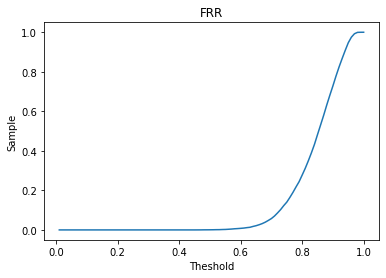

In [ ]:
import matplotlib.pyplot as plt
plt.plot(theshold_list, resnet_frr)
plt.title("FRR")
plt.xlabel('Theshold')
plt.ylabel('Sample')
plt.show()

####FAR

In [ ]:
masking_resnet_matric_far = pd.read_csv(path+'/resnet_masking_complete.csv')

ทำการ drop Column image_name ของทั้ง 2 table ออกสำหรับการทำ cross metrix

In [ ]:
resnet_distance_noImgName = resnet_distance.drop("image_name", 1)
masking_resnet_matric_far = masking_resnet_matric_far.drop("image_name", 1)

เริ่มทำการ FAR Masking 

*   คนเดียวกันเป็น 0
*   ไม่ใช่คนเดียวกันเป็น 1
*   รูปเดียวกัน Nan


In [ ]:
masking_resnet_matric_far = 1 - masking_resnet_matric_far
masking_resnet_matric_far

,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,m_14_9.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
1796,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1797,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
1798,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [ ]:
resnet_far_matric = resnet_distance_noImgName.multiply(masking_resnet_matric_far)
resnet_far_matric

,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,m_14_9.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.417363,0.445557,0.427380,0.443410,0.426408,0.394447,0.339149,0.402136,0.433510,0.358837
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.374828,0.423396,0.386984,0.401074,0.370849,0.350163,0.325469,0.360708,0.363284,0.325769
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.359508,0.375124,0.347746,0.380207,0.362734,0.338510,0.325136,0.335294,0.341702,0.341927
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.444753,0.487842,0.458839,0.505382,0.453166,0.416121,0.398387,0.459037,0.415871,0.413622
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.460723,0.438742,0.427562,0.461459,0.458205,0.438303,0.362588,0.426528,0.439079,0.373677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.394447,0.350163,0.338510,0.416121,0.438303,0.422697,0.441092,0.375946,0.421928,0.379749,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
1796,0.339149,0.325469,0.325136,0.398387,0.362588,0.355075,0.395779,0.335464,0.358474,0.352742,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1797,0.402136,0.360708,0.335294,0.459037,0.426528,0.383442,0.422658,0.439123,0.440592,0.446827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1798,0.433510,0.363284,0.341702,0.415871,0.439079,0.426461,0.417550,0.429022,0.435084,0.424602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [ ]:
resnet_far_matric.to_csv('resnet_masking_complete.csv', index=False)

In [ ]:
resnet_far = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด theshold
  resnet_far_sum_accept = np.sum(resnet_far_matric > thr) #นับจำนวนค่าที่มากกว่า thr และ มากกว่า 0 (จำนวน genuine sample ที่ถูก reject)
  resnet_far_sum_accept = np.sum(resnet_far_sum_accept)

  resnet_frr_sum_allImposter = np.sum(resnet_far_matric > 0) #นับจำนวนค่าที่มากกว่า 0 (จำนวน genuine sample ทั้งหมด)
  resnet_frr_sum_allImposter = np.sum(resnet_frr_sum_allImposter)

  resnet_far_sum = resnet_far_sum_accept / resnet_frr_sum_allImposter #จำนวน genuine sample ที่ถูก reject(น้อยกว่า thr และมากกว่า 0) หารด้วยจำนวน genuine sample ทั้งหมด
  #resnet_far_sum_nparray = resnet_far_sum.values # แปลง series เป็น nparray
  resnet_far.append(resnet_far_sum) #รวมค่า frr

In [ ]:
resnet_far

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999991899539333,
 0.9999389349888183,
 0.9998118200675827,
 0.9995351581801879,
 0.999021090484015,
 0.9980926530691088,
 0.9965367415086921,
 0.9941707838815788,
 0.9908284091879164,
 0.9861905838998982,
 0.9798753401414589,
 0.971283866935602,
 0.9596939770582492,
 0.9443286493977308,
 0.9243716067637601,
 0.8996614630553567,
 0.870120329227646,
 0.8352802478990209,
 0.7957013970802201,
 0.7516286599283296,
 0.704383657756783,
 0.6545440157223711,
 0.6038874733853133,
 0.5534253421042629,
 0.5038941406875547,
 0.4563431903477403,
 0.4111899763653482,
 0.36846129257181526,
 0.32832537930407074,
 0.29131437451669845,
 0.256812643199009,
 0.22500026482275257,
 0.19596260578111185,
 0.16964607841121304,
 0.14593229136484662,
 0.12500381656319887,
 0.10615902949003861,
 0.08975435041471243,
 0.0750800543603222,
 0.062303758551438236,
 0.05137249843754576,
 0.04176036718765091,
 0.03377767475

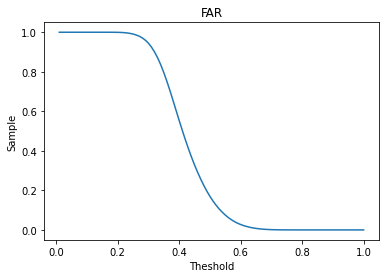

In [ ]:
import matplotlib.pyplot as plt
plt.plot(theshold_list, resnet_far) # plotting by columns
plt.title("FAR")
plt.xlabel('Theshold')
plt.ylabel('Sample')
plt.show()

####EER

In [ ]:
from sklearn import metrics
from scipy.optimize import brentq
from scipy.interpolate import interp1d

def cal_eer(frr, far):
    fpr, tpr, thresholds = metrics.roc_curve([1] * len(frr) + [0] * len(far), frr + far, pos_label=1)

    thresh = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    eer = interp1d(fpr, thresholds)(thresh)
    return eer, thresh

In [ ]:
err, thr = cal_eer(resnet_frr, resnet_far)

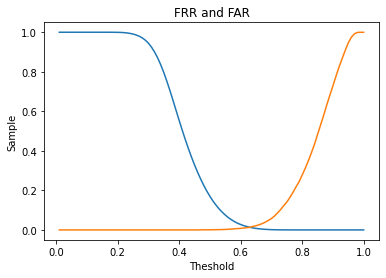

<Figure size 720x720 with 0 Axes>

EER =  0.013260366238686008


In [ ]:
import scipy.interpolate, scipy.optimize
plt.plot(theshold_list, resnet_far) # plotting by columns
plt.plot(theshold_list, resnet_frr)
plt.title("FRR and FAR")
plt.xlabel('Theshold')
plt.ylabel('Sample')


plt.figure(figsize=(10, 10))
plt.show()
print("EER = ",err)

In [ ]:
resnet_far[52]

0.10615902949003861

In [ ]:
resnet_frr[52]

0.001333052690661615

##senet

In [ ]:
vggface = VGGFace(model='senet50')

175702016/175688524 [==============================] - 2s 0us/step


In [ ]:
vggface.summary()

Model: "vggface_senet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                   

 <font marquee color='lightblue'>ปรับ Output Layer เป็น Flatten เพื่อให้ได้ผลลัพธ์เป็นเว็กเตอร์ 2048 มิติ</marquee>

In [ ]:
vgg_face=Model(inputs=vggface.layers[0].input,outputs=vggface.layers[-2].output)

In [ ]:
vgg_face.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                           

In [ ]:
img=load_img(path+'/Test_MTCNN_crop/1/m_1_1.jpg',target_size=(224,224,3))
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)

In [ ]:
img.shape

In [ ]:
# If you have pre-cropped images, you can skip the
# detection step.
img_encode = vgg_face(img)
img_encode

###Encoding

In [ ]:
df = pd.DataFrame(img_encode)
df.insert(0, "image_name", "w_1_2.jpg")
df = df.iloc[1: , :]
df

In [ ]:
# Get Image names stored in "Images" folder
imageEncode_path_names=[]
personEncode_names=set()
for file_name in glob.glob(path+'/Test_MTCNN_crop/*/*.jpg*'):
  imageEncode_path_names.append(file_name)
  personEncode_names.add(imageEncode_path_names[-1].split('/')[-1])
  #print(imageEncode_path_names[-1].split('/')[-1])

In [ ]:
for filename in imageEncode_path_names:
  imgCSV = load_img(filename, target_size=(224,224))
  imgCSV = img_to_array(imgCSV)
  imgCSV = np.expand_dims(imgCSV,axis=0)
  imgCSV = preprocess_input(imgCSV)
  img_encodeCSV = vgg_face(imgCSV)
  img_encodeCSV = img_encodeCSV.numpy()
  df555 = pd.DataFrame(img_encodeCSV)
  df555.insert(0, "image_name", filename.split("/")[-1])
  df = pd.concat([df,df555], axis=0)
  #df.append(df555, ignore_index=True)
  print(df)

In [ ]:
df

In [ ]:
df.to_csv('senet_encode.csv', index=False)

###Distance

In [ ]:
senet_encode = pd.read_csv(path+'/senet_encode.csv')

In [ ]:
senet_imgName = senet_encode["image_name"] #เก็บชื่อรูปภาพไว้ก่อนเอาออก เพื่อจะนำไปใส่กลับไปทีหลัง
senet_encode = senet_encode.drop('image_name', 1) #เอา col ชื่อรูปภาพ ออกก่อน เพื่อจะนำไปคำนวนหา distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A =  senet_encode
A_sparse = sparse.csr_matrix(A)

similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

#also can output sparse matrices
similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise dense output:
 [[1.         0.81367108 0.95478385 ... 0.45756196 0.4041034  0.43099353]
 [0.81367108 1.         0.7906241  ... 0.36827153 0.38947183 0.41174149]
 [0.95478385 0.7906241  1.         ... 0.45980863 0.41965992 0.42808391]
 ...
 [0.45756196 0.36827153 0.45980863 ... 1.         0.86826828 0.7988401 ]
 [0.4041034  0.38947183 0.41965992 ... 0.86826828 1.         0.86727912]
 [0.43099353 0.41174149 0.42808391 ... 0.7988401  0.86727912 1.        ]]

pairwise sparse output:
   (0, 1799)	0.43099353436174537
  (0, 1798)	0.40410340442157316
  (0, 1797)	0.4575619635219852
  (0, 1796)	0.4297269370171235
  (0, 1795)	0.4978177105344757
  (0, 1794)	0.4573880207684405
  (0, 1793)	0.39439697932089424
  (0, 1792)	0.42435098251227304
  (0, 1791)	0.41931154830499445
  (0, 1790)	0.45772572380285664
  (0, 1789)	0.490503489964833
  (0, 1788)	0.5173518291336845
  (0, 1787)	0.5227012179813051
  (0, 1786)	0.47004250235537615
  (0, 1785)	0.4749420613663456
  (0, 1784)	0.5390549628238112
  (0

แปลงเป็น dataframe และนำชื่อรูปกลับมา

In [ ]:
senet_distance = pd.DataFrame(similarities)
senet_distance.insert(0, "image_name", senet_imgName)

In [ ]:
senet_distance

,image_name,0,1,2,3,4,5,6,7,8,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,w_44_1.jpg,1.000000,0.813671,0.954784,0.845253,0.810591,0.939225,0.953461,0.954149,0.944385,...,0.457726,0.419312,0.424351,0.394397,0.457388,0.497818,0.429727,0.457562,0.404103,0.430994
1,w_44_2.jpg,0.813671,1.000000,0.790624,0.846506,0.844687,0.793284,0.809888,0.821877,0.849840,...,0.412056,0.390637,0.401149,0.376300,0.420561,0.438675,0.398425,0.368272,0.389472,0.411741
2,w_44_3.jpg,0.954784,0.790624,1.000000,0.858581,0.817226,0.926579,0.899936,0.914409,0.893045,...,0.474934,0.433418,0.434243,0.404950,0.468972,0.524129,0.451245,0.459809,0.419660,0.428084
3,w_44_4.jpg,0.845253,0.846506,0.858581,1.000000,0.943164,0.836932,0.841108,0.880692,0.870217,...,0.487299,0.438628,0.444998,0.427940,0.477924,0.507787,0.452325,0.439822,0.425065,0.442698
4,w_44_5.jpg,0.810591,0.844687,0.817226,0.943164,1.000000,0.790182,0.823147,0.853832,0.864467,...,0.481883,0.448356,0.445715,0.425130,0.460482,0.481614,0.448553,0.419616,0.426810,0.442280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_48_13.jpg,0.497818,0.438675,0.524129,0.507787,0.481614,0.509815,0.482473,0.525385,0.505147,...,0.898373,0.873422,0.876600,0.887765,0.948370,1.000000,0.873708,0.831030,0.844488,0.816069
1796,w_48_14.jpg,0.429727,0.398425,0.451245,0.452325,0.448553,0.458515,0.432814,0.449808,0.435292,...,0.860879,0.899289,0.889858,0.860409,0.881087,0.873708,1.000000,0.804246,0.869013,0.870511
1797,w_48_15.jpg,0.457562,0.368272,0.459809,0.439822,0.419616,0.462209,0.456253,0.485432,0.472785,...,0.853608,0.882070,0.866861,0.833850,0.855697,0.831030,0.804246,1.000000,0.868268,0.798840
1798,w_48_16.jpg,0.404103,0.389472,0.419660,0.425065,0.426810,0.422541,0.408857,0.434879,0.419174,...,0.897796,0.947307,0.938661,0.905625,0.886061,0.844488,0.869013,0.868268,1.000000,0.867279


เปลี่ยนชื่อให้ column

In [ ]:
col_name = list(senet_distance["image_name"])
col_name.insert(0, "image_name")
senet_distance.columns = col_name
senet_distance

,image_name,w_44_1.jpg,w_44_2.jpg,w_44_3.jpg,w_44_4.jpg,w_44_5.jpg,w_44_6.jpg,w_44_7.jpg,w_44_8.jpg,w_44_9.jpg,...,w_48_8.jpg,w_48_9.jpg,w_48_10.jpg,w_48_11.jpg,w_48_12.jpg,w_48_13.jpg,w_48_14.jpg,w_48_15.jpg,w_48_16.jpg,w_48_17.jpg
0,w_44_1.jpg,1.000000,0.813671,0.954784,0.845253,0.810591,0.939225,0.953461,0.954149,0.944385,...,0.457726,0.419312,0.424351,0.394397,0.457388,0.497818,0.429727,0.457562,0.404103,0.430994
1,w_44_2.jpg,0.813671,1.000000,0.790624,0.846506,0.844687,0.793284,0.809888,0.821877,0.849840,...,0.412056,0.390637,0.401149,0.376300,0.420561,0.438675,0.398425,0.368272,0.389472,0.411741
2,w_44_3.jpg,0.954784,0.790624,1.000000,0.858581,0.817226,0.926579,0.899936,0.914409,0.893045,...,0.474934,0.433418,0.434243,0.404950,0.468972,0.524129,0.451245,0.459809,0.419660,0.428084
3,w_44_4.jpg,0.845253,0.846506,0.858581,1.000000,0.943164,0.836932,0.841108,0.880692,0.870217,...,0.487299,0.438628,0.444998,0.427940,0.477924,0.507787,0.452325,0.439822,0.425065,0.442698
4,w_44_5.jpg,0.810591,0.844687,0.817226,0.943164,1.000000,0.790182,0.823147,0.853832,0.864467,...,0.481883,0.448356,0.445715,0.425130,0.460482,0.481614,0.448553,0.419616,0.426810,0.442280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_48_13.jpg,0.497818,0.438675,0.524129,0.507787,0.481614,0.509815,0.482473,0.525385,0.505147,...,0.898373,0.873422,0.876600,0.887765,0.948370,1.000000,0.873708,0.831030,0.844488,0.816069
1796,w_48_14.jpg,0.429727,0.398425,0.451245,0.452325,0.448553,0.458515,0.432814,0.449808,0.435292,...,0.860879,0.899289,0.889858,0.860409,0.881087,0.873708,1.000000,0.804246,0.869013,0.870511
1797,w_48_15.jpg,0.457562,0.368272,0.459809,0.439822,0.419616,0.462209,0.456253,0.485432,0.472785,...,0.853608,0.882070,0.866861,0.833850,0.855697,0.831030,0.804246,1.000000,0.868268,0.798840
1798,w_48_16.jpg,0.404103,0.389472,0.419660,0.425065,0.426810,0.422541,0.408857,0.434879,0.419174,...,0.897796,0.947307,0.938661,0.905625,0.886061,0.844488,0.869013,0.868268,1.000000,0.867279


In [ ]:
senet_distance.to_csv('senet_distance.csv', index=False)

### Setup FRR & FAR

In [ ]:
senet_distance = pd.read_csv(path+'/senet_distance.csv')

In [ ]:
%ls

assets/                       Test_MTCNN_crop-20210924T150627Z-001.zip
Images/                       train_data.npy
Images_crop/                  train_labels.npy
Images_test/                  variables/
masking_matric_complete.csv   vgg_distance.csv
masking_matric.csv            vgg_distance.gsheet
mmod_human_face_detector.dat  vgg_encode.csv
MTCNN_crop/                   vgg_encode_old.csv
Predictions/                  vgg_face_weights.h5
resnet_far_matric.csv         vgg_far_forDA.csv
resnet_frr_matric.csv         vgg_female_distance.csv
saved_model.pb                vgg_female_distance.gsheet
senet_distance.csv            vgg_female_encode.csv
senet_encode.csv              vgg_female_masking_complete.csv
senet_far_matric.csv          vgg_female_masking.csv
senet_masking_complete.csv    vgg_male_distance.csv
senet_masking.csv             vgg_male_distance.gsheet
test_data.npy                 vgg_male_encode.csv
test_labels.npy               vgg_male_masking_complete.csv
Test_MTCNN_c

In [ ]:
senet_masking = pd.read_csv(path+'/senet_masking.csv')
senet_masking

,image_name,w_44_1.jpg,w_44_2.jpg,w_44_3.jpg,w_44_4.jpg,w_44_5.jpg,w_44_6.jpg,w_44_7.jpg,w_44_8.jpg,w_44_9.jpg,...,w_48_8.jpg,w_48_9.jpg,w_48_10.jpg,w_48_11.jpg,w_48_12.jpg,w_48_13.jpg,w_48_14.jpg,w_48_15.jpg,w_48_16.jpg,w_48_17.jpg
0,w_44_1.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,w_44_2.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w_44_3.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,w_44_4.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,w_44_5.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_48_13.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1796,w_48_14.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1797,w_48_15.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1798,w_48_16.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


เริ่มทำการ FRR Masking 

*   คนเดียวกันเป็น 1
*   ไม่ใช่คนเดียวกันเป็น 0
*   รูปเดียวกัน Nan


In [ ]:
for i in range(len(senet_masking)):
  for j in range(len(col_name)):
    if senet_masking['image_name'][i][:4] == col_name[j][:4]:
      senet_masking.iloc[[i],[j]] = 1 #คนเดียวกัน
      if senet_masking['image_name'][i] == col_name[j]:
        senet_masking.iloc[[i],[j]] = np.nan #รูปเดียวกัน

In [ ]:
senet_masking

,image_name,w_44_1.jpg,w_44_2.jpg,w_44_3.jpg,w_44_4.jpg,w_44_5.jpg,w_44_6.jpg,w_44_7.jpg,w_44_8.jpg,w_44_9.jpg,...,w_48_8.jpg,w_48_9.jpg,w_48_10.jpg,w_48_11.jpg,w_48_12.jpg,w_48_13.jpg,w_48_14.jpg,w_48_15.jpg,w_48_16.jpg,w_48_17.jpg
0,w_44_1.jpg,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,w_44_2.jpg,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,w_44_3.jpg,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,w_44_4.jpg,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,w_44_5.jpg,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,w_48_13.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
1796,w_48_14.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
1797,w_48_15.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
1798,w_48_16.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0


In [ ]:
senet_masking.to_csv('senet_masking_complete.csv', index=False)

####FRR

ทำการ drop Column image_name ของทั้ง 2 table ออกสำหรับการทำ cross metrix

In [ ]:
senet_distance_noImgName = senet_distance.drop('image_name', 1)
senet_masking_noImgName = senet_masking.drop('image_name', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
senet_frr_matric = senet_distance_noImgName.multiply(senet_masking_noImgName)

In [ ]:
senet_frr_matric

,w_44_1.jpg,w_44_2.jpg,w_44_3.jpg,w_44_4.jpg,w_44_5.jpg,w_44_6.jpg,w_44_7.jpg,w_44_8.jpg,w_44_9.jpg,w_44_10.jpg,...,w_48_8.jpg,w_48_9.jpg,w_48_10.jpg,w_48_11.jpg,w_48_12.jpg,w_48_13.jpg,w_48_14.jpg,w_48_15.jpg,w_48_16.jpg,w_48_17.jpg
0,NaN,0.813671,0.954784,0.845253,0.810591,0.939225,0.953461,0.954149,0.944385,0.941085,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.813671,NaN,0.790624,0.846506,0.844687,0.793284,0.809888,0.821877,0.849840,0.826825,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.954784,0.790624,NaN,0.858581,0.817226,0.926579,0.899936,0.914409,0.893045,0.904586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.845253,0.846506,0.858581,NaN,0.943164,0.836932,0.841108,0.880692,0.870217,0.855979,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.810591,0.844687,0.817226,0.943164,NaN,0.790182,0.823147,0.853832,0.864467,0.837364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.898373,0.873422,0.876600,0.887765,0.948370,NaN,0.873708,0.831030,0.844488,0.816069
1796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.860879,0.899289,0.889858,0.860409,0.881087,0.873708,NaN,0.804246,0.869013,0.870511
1797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.853608,0.882070,0.866861,0.833850,0.855697,0.831030,0.804246,NaN,0.868268,0.798840
1798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.897796,0.947307,0.938661,0.905625,0.886061,0.844488,0.869013,0.868268,NaN,0.867279


กำหนด theshold ให้เป็น 0.01 ถึง 1.00

In [ ]:
senet_frr = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด threshold เริ่มที่ 0.01 - 1.00
  senet_frr_sum_reject = np.sum((senet_frr_matric < thr) & (senet_frr_matric > 0)) #นับจำนวนค่าที่มากกว่า thr และ มากกว่า 0 (จำนวน genuine sample ที่ถูก reject)
  senet_frr_sum_reject = np.sum(senet_frr_sum_reject)

  senet_frr_sum_allGenuine = np.sum(senet_frr_matric > 0) #นับจำนวนค่าที่มากกว่า 0 (จำนวน genuine sample ทั้งหมด)
  senet_frr_sum_allGenuine = np.sum(senet_frr_sum_allGenuine)
  
  senet_frr_sum = senet_frr_sum_reject / senet_frr_sum_allGenuine #จำนวน genuine sample ที่ถูก reject(น้อยกว่า thr และมากกว่า 0) หารด้วยจำนวน genuine sample ทั้งหมด
  #senet_frr_sum_nparray = senet_frr_sum.values # แปลง series เป็น nparray
  senet_frr.append(senet_frr_sum) #รวมค่า frr

In [ ]:
senet_frr

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.016066792955869e-05,
 7.016066792955869e-05,
 7.016066792955869e-05,
 7.016066792955869e-05,
 7.016066792955869e-05,
 7.016066792955869e-05,
 7.016066792955869e-05,
 0.00028064267171823475,
 0.00035080333964779346,
 0.0006314460113660282,
 0.001333052690661615,
 0.0016838560303094085,
 0.002034659369957202,
 0.00266610538132323,
 0.0035080333964779345,
 0.004981407422998667,
 0.006595102785378517,
 0.008910404827053953,
 0.011436188872518066,
 0.014803900933136884,
 0.019434505016487757,
 0.0258191257980776,
 0.034168245281695084,
 0.04223672209359433,
 0.05465516031712622,
 0.06952922191819266,
 0.08671858556093454,
 0.10559180523398583,
 0.12860450431488107,
 0.15400266610538133,


In [ ]:
theshold_list = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด theshold
  #print(thr)
  theshold_list.append(thr)

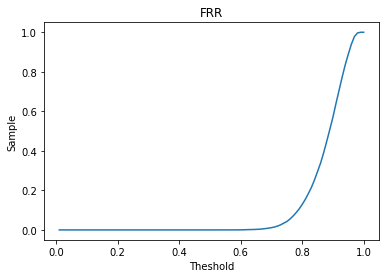

In [ ]:
import matplotlib.pyplot as plt
plt.plot(theshold_list, senet_frr)
plt.title("FRR")
plt.xlabel('Theshold')
plt.ylabel('Sample')
plt.show()

In [ ]:
senet_frr_matric.to_csv('senet_frr_matric.csv', index=False)

####FAR

In [ ]:
masking_senet_matric_far = pd.read_csv(path+'/senet_masking_complete.csv')

ทำการ drop Column image_name ของทั้ง 2 table ออกสำหรับการทำ cross metrix

In [ ]:
senet_distance_noImgName = senet_distance.drop("image_name", 1)
masking_senet_matric_far = masking_senet_matric_far.drop("image_name", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


เริ่มทำการ FAR Masking 

*   คนเดียวกันเป็น 0
*   ไม่ใช่คนเดียวกันเป็น 1
*   รูปเดียวกัน Nan


In [ ]:
masking_senet_matric_far = 1 - masking_senet_matric_far
masking_senet_matric_far

,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,m_14_9.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
1796,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1797,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
1798,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [ ]:
senet_far_matric = senet_distance_noImgName.multiply(masking_senet_matric_far)
senet_far_matric

,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,m_14_9.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.494242,0.513243,0.511187,0.528778,0.494918,0.499646,0.442066,0.510346,0.505896,0.432144
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.444626,0.464242,0.453176,0.474441,0.432719,0.441772,0.367187,0.464137,0.442779,0.396678
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.440466,0.465262,0.478718,0.473382,0.436538,0.442955,0.395484,0.476694,0.456953,0.397985
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.485223,0.507063,0.522518,0.520678,0.457045,0.469919,0.456834,0.553667,0.496006,0.440067
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.475719,0.465179,0.467870,0.484910,0.468611,0.487682,0.400803,0.462630,0.483448,0.398047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.499646,0.441772,0.442955,0.469919,0.487682,0.461758,0.479369,0.460710,0.503745,0.481950,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
1796,0.442066,0.367187,0.395484,0.456834,0.400803,0.374739,0.422809,0.439230,0.419061,0.429244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1797,0.510346,0.464137,0.476694,0.553667,0.462630,0.428964,0.481648,0.533075,0.494483,0.523558,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1798,0.505896,0.442779,0.456953,0.496006,0.483448,0.450533,0.478760,0.526048,0.500445,0.499489,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [ ]:
senet_far_matric.to_csv('senet_far_matric.csv', index=False)

In [ ]:
senet_far = []
for i in range(100):
  thr = (i + 1 )/100 #กำหนด theshold
  senet_far_sum_accept = np.sum(senet_far_matric > thr) #นับจำนวนค่าที่มากกว่า thr และ มากกว่า 0 (จำนวน genuine sample ที่ถูก reject)
  senet_far_sum_accept = np.sum(senet_far_sum_accept)

  senet_frr_sum_allImposter = np.sum(senet_far_matric > 0) #นับจำนวนค่าที่มากกว่า 0 (จำนวน genuine sample ทั้งหมด)
  senet_frr_sum_allImposter = np.sum(senet_frr_sum_allImposter)

  senet_far_sum = senet_far_sum_accept / senet_frr_sum_allImposter #จำนวน genuine sample ที่ถูก reject(น้อยกว่า thr และมากกว่า 0) หารด้วยจำนวน genuine sample ทั้งหมด
  #senet_far_sum_nparray = senet_far_sum.values # แปลง series เป็น nparray
  senet_far.append(senet_far_sum) #รวมค่า frr

In [ ]:
senet_far

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999962613258461,
 0.9999856684157431,
 0.9999719599438451,
 0.9999283420787153,
 0.9998448450226096,
 0.9997276998991181,
 0.999529550168957,
 0.999259742517511,
 0.9989064378099595,
 0.9984440884395833,
 0.9978571165974077,
 0.9971978637215884,
 0.996323637081915,
 0.9952363060154644,
 0.99385922770208,
 0.9920746339059113,
 0.9896631890765911,
 0.9866174158658115,
 0.9828419780826458,
 0.9779954101543636,
 0.9719655518563451,
 0.9642769684586755,
 0.9545427071864171,
 0.9422200371748833,
 0.9273500838397679,
 0.9098287874171183,
 0.8896436856597545,
 0.8665037850960248,
 0.8402221520182298,
 0.811206301909154,
 0.779284255757714,
 0.7448086951591024,
 0.7076718216752127,
 0.6687584548558212,
 0.6279458415662054,
 0.5866141756815447,
 0.5446350960558857,
 0.5025052232393493,
 0.46065201231020775,
 0.4195515211107352,
 0.3795470845507391,
 0.34115526277582847,
 0.3046128384824223,
 0.2700955293557579,
 0.2377591134855846,
 0.207

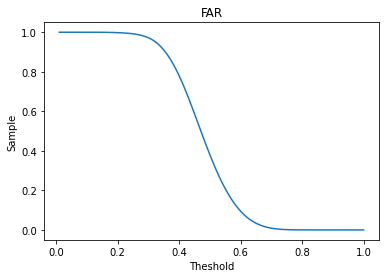

In [ ]:
import matplotlib.pyplot as plt
plt.plot(theshold_list, senet_far) # plotting by columns
plt.title("FAR")
plt.xlabel('Theshold')
plt.ylabel('Sample')
plt.show()

####EER

In [ ]:
err, thr = cal_eer(senet_frr, senet_far)

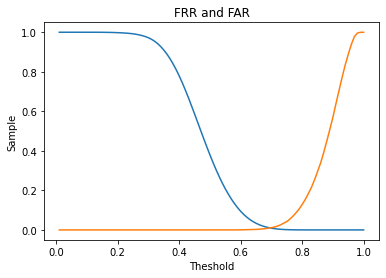

<Figure size 720x720 with 0 Axes>

EER =  0.008910404827026012


In [ ]:
import scipy.interpolate, scipy.optimize
plt.plot(theshold_list, senet_far) # plotting by columns
plt.plot(theshold_list, senet_frr)
plt.title("FRR and FAR")
plt.xlabel('Theshold')
plt.ylabel('Sample')


plt.figure(figsize=(10, 10))
plt.show()
print("EER = ",err)

In [ ]:
print("THR = ",thr)

In [ ]:
senet_frr[78]

0.10559180523398583

In [ ]:
senet_far[78]

0.00015328564031337567

# Dictionary Attack


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
vgg_resnet_far = pd.read_csv(path+'/resnet_far_matric.csv')
vgg_senet_far = pd.read_csv(path+'/senet_far_matric.csv')

In [ ]:
vgg_resnet_far

,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,m_14_9.jpg,m_14_12.jpg,m_14_10.jpg,m_14_13.jpg,m_14_14.jpg,m_14_15.jpg,m_14_17.jpg,m_14_16.jpg,m_18_1.jpg,m_18_3.jpg,m_18_4.jpg,m_18_2.jpg,m_18_7.jpg,m_18_5.jpg,m_18_6.jpg,m_18_10.jpg,m_18_11.jpg,m_18_8.jpg,m_18_9.jpg,m_18_13.jpg,m_18_12.jpg,m_18_14.jpg,m_18_17.jpg,m_18_16.jpg,m_18_15.jpg,m_12_1.jpg,m_12_2.jpg,m_12_3.jpg,m_12_4.jpg,m_12_5.jpg,m_12_8.jpg,...,w_6_13.jpg,w_6_12.jpg,w_6_16.jpg,w_6_14.jpg,w_6_15.jpg,w_6_17.jpg,w_5_1.jpg,w_5_3.jpg,w_5_2.jpg,w_5_4.jpg,w_5_5.jpg,w_5_6.jpg,w_5_8.jpg,w_5_7.jpg,w_5_9.jpg,w_5_10.jpg,w_5_11.jpg,w_5_13.jpg,w_5_12.jpg,w_5_14.jpg,w_5_16.jpg,w_5_17.jpg,w_5_15.jpg,w_7_1.jpg,w_7_2.jpg,w_7_5.jpg,w_7_4.jpg,w_7_3.jpg,w_7_7.jpg,w_7_8.jpg,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.555866,0.556174,0.489291,0.506520,0.486669,0.529096,0.552344,0.520054,0.560796,0.479187,0.489466,0.549814,0.597147,0.502605,0.501872,0.489502,0.532320,0.558497,0.603716,0.542838,0.630826,0.579666,0.620179,...,0.490616,0.487076,0.450316,0.466572,0.448339,0.451963,0.391229,0.360165,0.381667,0.425369,0.404321,0.397527,0.386509,0.380481,0.395179,0.386893,0.383060,0.376306,0.390055,0.386382,0.388249,0.368431,0.362853,0.451054,0.381296,0.463333,0.419976,0.468122,0.451261,0.468774,0.417363,0.445557,0.427380,0.443410,0.426408,0.394447,0.339149,0.402136,0.433510,0.358837
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.548670,0.531800,0.588400,0.600619,0.482928,0.615854,0.530994,0.566963,0.542396,0.488996,0.516576,0.534956,0.600003,0.540927,0.530664,0.488543,0.493308,0.443594,0.536577,0.410870,0.484048,0.521660,0.464457,...,0.427540,0.448822,0.362370,0.429600,0.394881,0.412326,0.325160,0.319481,0.348479,0.391292,0.391039,0.350819,0.349495,0.335110,0.355741,0.341313,0.350400,0.320828,0.350076,0.312609,0.328170,0.320279,0.336067,0.390716,0.414866,0.423924,0.434019,0.402517,0.376316,0.384847,0.374828,0.423396,0.386984,0.401074,0.370849,0.350163,0.325469,0.360708,0.363284,0.325769
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.555858,0.625320,0.593448,0.529738,0.485342,0.687203,0.542496,0.492889,0.485744,0.484029,0.490656,0.545147,0.526960,0.507750,0.487394,0.440353,0.494098,0.378010,0.435328,0.416746,0.477146,0.484412,0.392999,...,0.420202,0.399292,0.331545,0.376466,0.390233,0.400600,0.342956,0.384897,0.338381,0.421549,0.400887,0.364272,0.358932,0.338840,0.337770,0.332409,0.349590,0.351760,0.369099,0.326132,0.316027,0.334839,0.348032,0.377267,0.344754,0.407227,0.420257,0.400667,0.368169,0.360839,0.359508,0.375124,0.347746,0.380207,0.362734,0.338510,0.325136,0.335294,0.341702,0.341927
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.570335,0.578449,0.614610,0.602741,0.479097,0.667377,0.540088,0.540674,0.556352,0.476789,0.486248,0.544967,0.579751,0.528370,0.557031,0.489067,0.511100,0.478502,0.535898,0.469808,0.583986,0.570160,0.509315,...,0.484128,0.490491,0.447859,0.465246,0.467378,0.445092,0.371566,0.362442,0.385102,0.454109,0.430472,0.385582,0.387023,0.371571,0.383520,0.379237,0.377426,0.360131,0.388316,0.359695,0.379905,0.356491,0.360954,0.485702,0.422310,0.506580,0.527768,0.499859,0.475880,0.482037,0.444753,0.487842,0.458839,0.505382,0.453166,0.416121,0.398387,0.459037,0.415871,0.413622
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.556417,0.525062,0.479067,0.530929,0.492085,0.522738,0.558214,0.513068,0.552847,0.

In [ ]:
vgg_senet_far

,w_44_1.jpg,w_44_2.jpg,w_44_3.jpg,w_44_4.jpg,w_44_5.jpg,w_44_6.jpg,w_44_7.jpg,w_44_8.jpg,w_44_9.jpg,w_44_10.jpg,w_44_11.jpg,w_44_12.jpg,w_44_13.jpg,w_44_14.jpg,w_44_15.jpg,w_44_16.jpg,w_44_17.jpg,m_54_1.jpg,m_54_2.jpg,m_54_3.jpg,m_54_4.jpg,m_54_5.jpg,m_54_6.jpg,m_54_7.jpg,m_54_8.jpg,m_54_9.jpg,m_54_10.jpg,m_54_11.jpg,m_54_12.jpg,m_54_13.jpg,m_54_14.jpg,m_54_15.jpg,m_54_16.jpg,m_54_17.jpg,w_25_1.jpg,w_25_2.jpg,w_25_3.jpg,w_25_4.jpg,w_25_5.jpg,w_25_6.jpg,...,m_28_12.jpg,m_28_13.jpg,m_28_14.jpg,m_28_15.jpg,m_28_16.jpg,m_28_17.jpg,w_32_1.jpg,w_32_2.jpg,w_32_3.jpg,w_32_4.jpg,w_32_5.jpg,w_32_6.jpg,w_32_7.jpg,w_32_8.jpg,w_32_9.jpg,w_32_10.jpg,w_32_11.jpg,w_32_12.jpg,w_32_13.jpg,w_32_14.jpg,w_32_15.jpg,w_32_16.jpg,w_32_17.jpg,w_48_1.jpg,w_48_2.jpg,w_48_3.jpg,w_48_4.jpg,w_48_5.jpg,w_48_6.jpg,w_48_7.jpg,w_48_8.jpg,w_48_9.jpg,w_48_10.jpg,w_48_11.jpg,w_48_12.jpg,w_48_13.jpg,w_48_14.jpg,w_48_15.jpg,w_48_16.jpg,w_48_17.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348608,0.323237,0.391333,0.362652,0.400506,0.393316,0.366998,0.373443,0.346052,0.340801,0.355209,0.342872,0.351712,0.356101,0.423683,0.359063,0.341543,0.629358,0.527966,0.628920,0.550135,0.572625,0.613361,...,0.359769,0.381051,0.358945,0.370021,0.378608,0.361717,0.472505,0.530098,0.475295,0.466319,0.437036,0.488874,0.533834,0.522643,0.459840,0.460797,0.450022,0.476747,0.524486,0.434161,0.451993,0.445638,0.480261,0.436293,0.539055,0.474942,0.470043,0.522701,0.517352,0.490503,0.457726,0.419312,0.424351,0.394397,0.457388,0.497818,0.429727,0.457562,0.404103,0.430994
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.406743,0.412964,0.411369,0.378184,0.422896,0.398573,0.416751,0.442436,0.405991,0.411900,0.394757,0.392779,0.392113,0.403985,0.415026,0.412899,0.391089,0.546283,0.531516,0.535390,0.459909,0.508978,0.525355,...,0.365407,0.372182,0.357991,0.363147,0.383148,0.361697,0.473578,0.602104,0.462901,0.457607,0.465386,0.463220,0.506744,0.515122,0.469233,0.462435,0.446736,0.467307,0.490200,0.390255,0.424564,0.432871,0.475511,0.389627,0.628154,0.418383,0.431152,0.473471,0.429457,0.430469,0.412056,0.390637,0.401149,0.376300,0.420561,0.438675,0.398425,0.368272,0.389472,0.411741
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.323087,0.299072,0.376561,0.354849,0.384564,0.355508,0.333629,0.346495,0.323218,0.317532,0.327804,0.314722,0.321479,0.321664,0.396675,0.331159,0.318702,0.619669,0.541312,0.660111,0.583605,0.605657,0.587193,...,0.339032,0.349332,0.354018,0.349637,0.377284,0.348905,0.481159,0.542330,0.485095,0.472643,0.436362,0.490999,0.535339,0.532479,0.470083,0.464374,0.462769,0.493567,0.519533,0.440766,0.453081,0.451604,0.482776,0.443288,0.537888,0.502755,0.510550,0.551137,0.532643,0.520697,0.474934,0.433418,0.434243,0.404950,0.468972,0.524129,0.451245,0.459809,0.419660,0.428084
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.345610,0.336411,0.357190,0.374617,0.407189,0.354382,0.358728,0.381780,0.351810,0.344247,0.337720,0.335335,0.341823,0.335025,0.401132,0.348139,0.344305,0.564906,0.536068,0.629181,0.579559,0.617345,0.563921,...,0.391859,0.394437,0.399599,0.404597,0.419293,0.401929,0.515505,0.580294,0.504101,0.509506,0.495412,0.524864,0.574131,0.569675,0.514409,0.510559,0.494990,0.523446,0.546960,0.437051,0.456993,0.466363,0.504512,0.439514,0.589749,0.468860,0.535695,0.538988,0.498843,0.514840,0.487299,0.438628,0.444998,0.427940,0.477924,0.507787,0.452325,0.439822,0.425065,0.442698
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.349052,0.337334,0.366183,0.361382,0.41364

In [ ]:
senet_thr = 0.6900000000001206
resnet_thr = 0.6200000000000033

In [ ]:
#row
len(vgg_senet_far)

1800

In [ ]:
#column
col_name = list(vgg_senet_far)
col_name[1][:]

'w_44_2.jpg'

In [ ]:
senet_user = {}
for i in range(len(col_name)):
  senet_user[col_name[i][:]] = 0

In [ ]:
resnet_user = {}
for i in range(len(col_name)):
  resnet_user[col_name[i][:]] = 0

In [ ]:
len(senet_user)

1800

In [ ]:
len(resnet_user)

1800

In [ ]:
for i in range(len(vgg_senet_far)):
  count = 0
  for j in range(len(col_name)):
    #user[col_name[j][:4]] = count
    if vgg_senet_far[col_name[j]][i] > senet_thr:
      count += 1
      senet_user[col_name[j][:]] += 1
      #print(count)

In [ ]:
for i in range(len(vgg_resnet_far)):
  count = 0
  for j in range(len(col_name)):
    #user[col_name[j][:4]] = count
    if vgg_resnet_far[col_name[j]][i] > resnet_thr:
      count += 1
      resnet_user[col_name[j][:]] += 1
      #print(count)

In [ ]:
senet_user

{'w_44_1.jpg': 3,
 'w_44_2.jpg': 5,
 'w_44_3.jpg': 2,
 'w_44_4.jpg': 7,
 'w_44_5.jpg': 18,
 'w_44_6.jpg': 3,
 'w_44_7.jpg': 3,
 'w_44_8.jpg': 13,
 'w_44_9.jpg': 14,
 'w_44_10.jpg': 13,
 'w_44_11.jpg': 11,
 'w_44_12.jpg': 10,
 'w_44_13.jpg': 3,
 'w_44_14.jpg': 12,
 'w_44_15.jpg': 12,
 'w_44_16.jpg': 0,
 'w_44_17.jpg': 33,
 'm_54_1.jpg': 1,
 'm_54_2.jpg': 1,
 'm_54_3.jpg': 3,
 'm_54_4.jpg': 1,
 'm_54_5.jpg': 4,
 'm_54_6.jpg': 2,
 'm_54_7.jpg': 0,
 'm_54_8.jpg': 3,
 'm_54_9.jpg': 1,
 'm_54_10.jpg': 2,
 'm_54_11.jpg': 8,
 'm_54_12.jpg': 2,
 'm_54_13.jpg': 0,
 'm_54_14.jpg': 3,
 'm_54_15.jpg': 3,
 'm_54_16.jpg': 1,
 'm_54_17.jpg': 1,
 'w_25_1.jpg': 1,
 'w_25_2.jpg': 2,
 'w_25_3.jpg': 1,
 'w_25_4.jpg': 5,
 'w_25_5.jpg': 9,
 'w_25_6.jpg': 0,
 'w_25_7.jpg': 0,
 'w_25_8.jpg': 1,
 'w_25_9.jpg': 6,
 'w_25_10.jpg': 5,
 'w_25_11.jpg': 3,
 'w_25_12.jpg': 1,
 'w_25_13.jpg': 0,
 'w_25_14.jpg': 1,
 'w_25_15.jpg': 0,
 'w_25_16.jpg': 0,
 'w_25_17.jpg': 0,
 'm_39_1.jpg': 31,
 'm_39_2.jpg': 16,
 'm_39_3.jp

In [ ]:
resnet_user

{'w_44_1.jpg': 3,
 'w_44_2.jpg': 1,
 'w_44_3.jpg': 4,
 'w_44_4.jpg': 13,
 'w_44_5.jpg': 12,
 'w_44_6.jpg': 6,
 'w_44_7.jpg': 4,
 'w_44_8.jpg': 6,
 'w_44_9.jpg': 7,
 'w_44_10.jpg': 6,
 'w_44_11.jpg': 7,
 'w_44_12.jpg': 7,
 'w_44_13.jpg': 4,
 'w_44_14.jpg': 6,
 'w_44_15.jpg': 5,
 'w_44_16.jpg': 6,
 'w_44_17.jpg': 17,
 'm_54_1.jpg': 8,
 'm_54_2.jpg': 1,
 'm_54_3.jpg': 2,
 'm_54_4.jpg': 5,
 'm_54_5.jpg': 11,
 'm_54_6.jpg': 10,
 'm_54_7.jpg': 5,
 'm_54_8.jpg': 13,
 'm_54_9.jpg': 5,
 'm_54_10.jpg': 5,
 'm_54_11.jpg': 3,
 'm_54_12.jpg': 4,
 'm_54_13.jpg': 7,
 'm_54_14.jpg': 14,
 'm_54_15.jpg': 15,
 'm_54_16.jpg': 2,
 'm_54_17.jpg': 8,
 'w_25_1.jpg': 9,
 'w_25_2.jpg': 18,
 'w_25_3.jpg': 36,
 'w_25_4.jpg': 65,
 'w_25_5.jpg': 25,
 'w_25_6.jpg': 6,
 'w_25_7.jpg': 17,
 'w_25_8.jpg': 22,
 'w_25_9.jpg': 38,
 'w_25_10.jpg': 35,
 'w_25_11.jpg': 51,
 'w_25_12.jpg': 31,
 'w_25_13.jpg': 35,
 'w_25_14.jpg': 16,
 'w_25_15.jpg': 4,
 'w_25_16.jpg': 20,
 'w_25_17.jpg': 5,
 'm_39_1.jpg': 15,
 'm_39_2.jpg': 20,

In [ ]:
len(senet_user)

1800

In [ ]:
len(resnet_user)

1800

In [ ]:
senet_sortedUser = sorted(senet_user.items(), key=lambda x: x[1], reverse=True)

In [ ]:
resnet_sortedUser = sorted(resnet_user.items(), key=lambda x: x[1], reverse=True)

In [ ]:
senet_sortedUser

[('m_44_5.jpg', 138),
 ('w_16_9.jpg', 133),
 ('m_44_4.jpg', 131),
 ('w_29_15.jpg', 120),
 ('w_16_8.jpg', 115),
 ('w_33_6.jpg', 114),
 ('w_6_8.jpg', 108),
 ('w_6_7.jpg', 106),
 ('w_29_8.jpg', 104),
 ('w_20_17.jpg', 103),
 ('w_3_15.jpg', 103),
 ('w_29_7.jpg', 98),
 ('w_29_9.jpg', 97),
 ('w_6_13.jpg', 97),
 ('w_6_3.jpg', 95),
 ('w_33_13.jpg', 93),
 ('w_33_7.jpg', 92),
 ('w_19_13.jpg', 92),
 ('w_6_17.jpg', 92),
 ('w_3_1.jpg', 92),
 ('m_9_7.jpg', 92),
 ('w_35_9.jpg', 92),
 ('w_19_8.jpg', 90),
 ('w_24_6.jpg', 89),
 ('m_49_1.jpg', 89),
 ('w_16_6.jpg', 88),
 ('w_6_6.jpg', 88),
 ('w_6_12.jpg', 88),
 ('w_4_3.jpg', 86),
 ('m_49_16.jpg', 86),
 ('m_49_17.jpg', 86),
 ('w_6_5.jpg', 85),
 ('w_6_11.jpg', 85),
 ('m_49_10.jpg', 85),
 ('w_29_11.jpg', 84),
 ('w_16_7.jpg', 84),
 ('m_49_4.jpg', 84),
 ('m_9_1.jpg', 84),
 ('m_1_5.jpg', 83),
 ('w_19_7.jpg', 82),
 ('w_24_1.jpg', 80),
 ('w_16_14.jpg', 80),
 ('m_32_8.jpg', 79),
 ('m_1_4.jpg', 79),
 ('w_6_1.jpg', 78),
 ('w_16_5.jpg', 77),
 ('m_26_11.jpg', 77),
 ('w

In [ ]:
resnet_sortedUser

[('w_16_7.jpg', 212),
 ('w_6_17.jpg', 207),
 ('w_3_15.jpg', 184),
 ('w_16_8.jpg', 181),
 ('w_6_3.jpg', 181),
 ('w_6_11.jpg', 181),
 ('w_6_13.jpg', 180),
 ('w_6_8.jpg', 178),
 ('w_6_12.jpg', 175),
 ('w_1_8.jpg', 175),
 ('w_16_10.jpg', 173),
 ('w_16_14.jpg', 173),
 ('w_16_1.jpg', 169),
 ('w_1_9.jpg', 169),
 ('w_24_7.jpg', 168),
 ('w_4_17.jpg', 165),
 ('w_16_6.jpg', 163),
 ('w_35_7.jpg', 162),
 ('w_3_13.jpg', 161),
 ('w_6_1.jpg', 159),
 ('w_35_11.jpg', 156),
 ('w_16_11.jpg', 155),
 ('w_16_12.jpg', 154),
 ('w_6_10.jpg', 152),
 ('w_6_6.jpg', 151),
 ('w_4_8.jpg', 150),
 ('w_16_5.jpg', 150),
 ('w_6_14.jpg', 150),
 ('w_24_6.jpg', 146),
 ('w_6_15.jpg', 145),
 ('w_29_8.jpg', 143),
 ('w_4_13.jpg', 140),
 ('w_4_6.jpg', 137),
 ('w_35_9.jpg', 136),
 ('w_1_10.jpg', 136),
 ('w_4_7.jpg', 135),
 ('w_29_7.jpg', 135),
 ('w_16_13.jpg', 134),
 ('w_29_9.jpg', 133),
 ('w_3_6.jpg', 133),
 ('w_16_9.jpg', 132),
 ('w_6_7.jpg', 132),
 ('w_43_15.jpg', 129),
 ('w_3_8.jpg', 129),
 ('w_26_4.jpg', 127),
 ('w_35_10.jpg'

In [ ]:
sum(x[1] for x in senet_sortedUser)

37910

In [ ]:
sum(x[1] for x in resnet_sortedUser)

54982

In [ ]:
test = 0

In [ ]:
#zeroFAR = vgg_far['w_7_2.jpg'].tolist()

In [ ]:
#zeroFAR[0]

In [ ]:
#for i in range(len(zeroFAR)):
  #if zeroFAR[i] > thr:
    #print(zeroFAR[i])

In [ ]:
#w_6_8.jpg คือรูปที่มีจำนวน FAR 
#mostFAR = vgg_far['w_6_8.jpg'].tolist() 

In [ ]:
#mostFAR[0]

In [ ]:
#count = 0
#for i in range(len(mostFAR)):
#  if mostFAR[i] > thr:
#    #print(mostFAR[i])
#    count +=1
#print(count)

In [ ]:
senet_far1st = vgg_senet_far[senet_sortedUser[0][0]].tolist() 
senet_far2nd = vgg_senet_far[senet_sortedUser[1][0]].tolist() 
senet_far3rd = vgg_senet_far[senet_sortedUser[2][0]].tolist() 
senet_far4th = vgg_senet_far[senet_sortedUser[3][0]].tolist() 
senet_far5th = vgg_senet_far[senet_sortedUser[4][0]].tolist() 

In [ ]:
resnet_far1st = vgg_resnet_far[resnet_sortedUser[0][0]].tolist() 
resnet_far2nd = vgg_resnet_far[resnet_sortedUser[1][0]].tolist() 
resnet_far3rd = vgg_resnet_far[resnet_sortedUser[2][0]].tolist() 
resnet_far4th = vgg_resnet_far[resnet_sortedUser[3][0]].tolist() 
resnet_far5th = vgg_resnet_far[resnet_sortedUser[4][0]].tolist() 

In [ ]:
len(resnet_far5th)

1800

In [ ]:
resnet_sortedUser[0][0]

'w_16_7.jpg'

In [ ]:
vgg_senet_ImgName_list = vgg_senet_far.columns.values.tolist()

In [ ]:
vgg_resnet_ImgName_list = vgg_resnet_far.columns.values.tolist()

In [ ]:
senet_far1st

[0.4491362498654085,
 0.4493387886824973,
 0.4513474640946268,
 0.4767960491200955,
 0.4687205644554352,
 0.4825454366830171,
 0.4540800780987454,
 0.4598330697802962,
 0.456494975132003,
 0.4667717051430231,
 0.4415588725713436,
 0.4502203600077339,
 0.4680402841235087,
 0.4220687653911997,
 0.4676381911533069,
 0.4226418408399329,
 0.4684829318973279,
 0.5418307830017365,
 0.5152624563517676,
 0.5424007469135074,
 0.6071792575150743,
 0.5937483645772703,
 0.5609597379884812,
 0.5288714302186648,
 0.5493273489005244,
 0.553884933219671,
 0.525632619939287,
 0.5456619073689495,
 0.5416920956079954,
 0.5562098383055248,
 0.5487823464039463,
 0.5993547117862766,
 0.5475286164354356,
 0.5764841630516003,
 0.465560891106795,
 0.4488488044890872,
 0.5163344428550719,
 0.4436260511264175,
 0.4605350497167084,
 0.4761542658060128,
 0.4801797136614091,
 0.4771755053433689,
 0.4594659301289438,
 0.4670644796118509,
 0.4679574346628708,
 0.4773415603593149,
 0.4723689379813225,
 0.43796607861124

In [ ]:
for i in range(len(senet_far5th)):
  #อันดับ1
  if senet_far1st[i] > senet_thr:
    senet_far1st[i] = (vgg_senet_ImgName_list[i], 1)
  else:
    senet_far1st[i] = (vgg_senet_ImgName_list[i], 0)
  #อันดับ2
  if senet_far2nd[i] > senet_thr:
    senet_far2nd[i] = (vgg_senet_ImgName_list[i], 1)
  else:
    senet_far2nd[i] = (vgg_senet_ImgName_list[i], 0)
  #อันดับ3
  if senet_far3rd[i] > senet_thr:
    senet_far3rd[i] = (vgg_senet_ImgName_list[i], 1)
  else:
    senet_far3rd[i] = (vgg_senet_ImgName_list[i], 0)
  #อันดับ4
  if senet_far4th[i] > senet_thr:
    senet_far4th[i] = (vgg_senet_ImgName_list[i], 1)
  else:
    senet_far4th[i] = (vgg_senet_ImgName_list[i], 0)
  #อันดับ5
  if senet_far5th[i] > senet_thr:
    senet_far5th[i] = (vgg_senet_ImgName_list[i], 1)
  else:
    senet_far5th[i] = (vgg_senet_ImgName_list[i], 0)

In [ ]:
for i in range(len(resnet_far5th)):
  #อันดับ1
  if resnet_far1st[i] > resnet_thr:
    resnet_far1st[i] = (vgg_resnet_ImgName_list[i], 1)
  else:
    resnet_far1st[i] = (vgg_resnet_ImgName_list[i], 0)
  #อันดับ2
  if resnet_far2nd[i] > resnet_thr:
    resnet_far2nd[i] = (vgg_resnet_ImgName_list[i], 1)
  else:
    resnet_far2nd[i] = (vgg_resnet_ImgName_list[i], 0)
  #อันดับ3
  if resnet_far3rd[i] > resnet_thr:
    resnet_far3rd[i] = (vgg_resnet_ImgName_list[i], 1)
  else:
    resnet_far3rd[i] = (vgg_resnet_ImgName_list[i], 0)
  #อันดับ4
  if resnet_far4th[i] > resnet_thr:
    resnet_far4th[i] = (vgg_resnet_ImgName_list[i], 1)
  else:
    resnet_far4th[i] = (vgg_resnet_ImgName_list[i], 0)
  #อันดับ5
  if resnet_far5th[i] > resnet_thr:
    resnet_far5th[i] = (vgg_resnet_ImgName_list[i], 1)
  else:
    resnet_far5th[i] = (vgg_resnet_ImgName_list[i], 0)

In [ ]:
senet_far1stForUnion = senet_far1st
senet_far2ndForUnion = senet_far2nd
senet_far3rdForUnion = senet_far3rd
senet_far4thForUnion = senet_far4th
senet_far5thForUnion = senet_far5th

In [ ]:
resnet_far1stForUnion = resnet_far1st
resnet_far2ndForUnion = resnet_far2nd
resnet_far3rdForUnion = resnet_far3rd
resnet_far4thForUnion = resnet_far4th
resnet_far5thForUnion = resnet_far5th

In [ ]:
senet_far1stForUnion[0][1]

0

In [ ]:
resnet_far1stForUnion[0][1]

0

In [ ]:
count = 0
for i in range(len(senet_far1stForUnion)):
  if senet_far1stForUnion[i][1] == 1:
    #print(mostFAR[i])
    count +=1
print(count)

138


In [ ]:
count = 0
for i in range(len(resnet_far2ndForUnion)):
  if resnet_far2ndForUnion[i][1] == 1:
    #print(mostFAR[i])
    count +=1
print(count)

207


### 5 อันดับ

In [ ]:
senet_union_5 =list(set().union(senet_far1stForUnion,senet_far2ndForUnion,senet_far3rdForUnion,senet_far4thForUnion,senet_far5thForUnion))
senet_sortedUnion_5 = sorted(senet_union_5, key=lambda x: x[0], reverse=False)
#senet_sortedUnion_5
resnet_union_5 =list(set().union(resnet_far1stForUnion,resnet_far2ndForUnion,resnet_far3rdForUnion,resnet_far4thForUnion,resnet_far5thForUnion))
resnet_sortedUnion_5 = sorted(resnet_union_5, key=lambda x: x[0], reverse=False)
#resnet_sortedUnion_5

In [ ]:
senet_resultUnion_5 = []
for i in range(len(senet_sortedUnion_5)):
  if senet_sortedUnion_5[i][1] == 1:
    senet_resultUnion_5.append(senet_sortedUnion_5[i])

len(senet_resultUnion_5)

387

In [ ]:
resnet_resultUnion_5 = []
for i in range(len(resnet_sortedUnion_5)):
  if resnet_sortedUnion_5[i][1] == 1:
    resnet_resultUnion_5.append(resnet_sortedUnion_5[i])

len(resnet_resultUnion_5)

413

### 4 อันดับ

In [ ]:
senet_union_4 =list(set().union(senet_far1stForUnion,senet_far2ndForUnion,senet_far3rdForUnion,senet_far4thForUnion))
senet_sortedUnion_4 = sorted(senet_union_4, key=lambda x: x[0], reverse=False)
#senet_sortedUnion_5
resnet_union_4 =list(set().union(resnet_far1stForUnion,resnet_far2ndForUnion,resnet_far3rdForUnion,resnet_far4thForUnion))
resnet_sortedUnion_4 = sorted(resnet_union_4, key=lambda x: x[0], reverse=False)
#resnet_sortedUnion_5

In [ ]:
senet_resultUnion_4 = []
for i in range(len(senet_sortedUnion_4)):
  if senet_sortedUnion_4[i][1] == 1:
    senet_resultUnion_4.append(senet_sortedUnion_4[i])

len(senet_resultUnion_4)

378

In [ ]:
resnet_resultUnion_4 = []
for i in range(len(resnet_sortedUnion_4)):
  if resnet_sortedUnion_4[i][1] == 1:
    resnet_resultUnion_4.append(resnet_sortedUnion_4[i])

len(resnet_resultUnion_4)

378

### 3 อันดับ

In [ ]:
senet_union_3 =list(set().union(senet_far1stForUnion,senet_far2ndForUnion,senet_far3rdForUnion))
senet_sortedUnion_3 = sorted(senet_union_3, key=lambda x: x[0], reverse=False)
#senet_sortedUnion_5
resnet_union_3 =list(set().union(resnet_far1stForUnion,resnet_far2ndForUnion,resnet_far3rdForUnion))
resnet_sortedUnion_3 = sorted(resnet_union_3, key=lambda x: x[0], reverse=False)
#resnet_sortedUnion_5

In [ ]:
senet_resultUnion_3 = []
for i in range(len(senet_sortedUnion_3)):
  if senet_sortedUnion_3[i][1] == 1:
    senet_resultUnion_3.append(senet_sortedUnion_3[i])

len(senet_resultUnion_3)

298

In [ ]:
resnet_resultUnion_3 = []
for i in range(len(resnet_sortedUnion_3)):
  if resnet_sortedUnion_3[i][1] == 1:
    resnet_resultUnion_3.append(resnet_sortedUnion_3[i])

len(resnet_resultUnion_3)

367

### 2 อันดับ

In [ ]:
senet_union_2 =list(set().union(senet_far1stForUnion,senet_far2ndForUnion))
senet_sortedUnion_2 = sorted(senet_union_2, key=lambda x: x[0], reverse=False)
#senet_sortedUnion_5
resnet_union_2 =list(set().union(resnet_far1stForUnion,resnet_far2ndForUnion))
resnet_sortedUnion_2 = sorted(resnet_union_2, key=lambda x: x[0], reverse=False)
#resnet_sortedUnion_5

In [ ]:
senet_resultUnion_2 = []
for i in range(len(senet_sortedUnion_2)):
  if senet_sortedUnion_2[i][1] == 1:
    senet_resultUnion_2.append(senet_sortedUnion_2[i])

len(senet_resultUnion_2)

271

In [ ]:
resnet_resultUnion_2 = []
for i in range(len(resnet_sortedUnion_2)):
  if resnet_sortedUnion_2[i][1] == 1:
    resnet_resultUnion_2.append(resnet_sortedUnion_2[i])

len(resnet_resultUnion_2)

310

### 1 อันดับ

In [ ]:
senet_sortedUnion_1 = senet_far1stForUnion
senet_resultUnion_1 = []
for i in range(len(senet_sortedUnion_1)):
  if senet_sortedUnion_1[i][1] == 1:
    senet_resultUnion_1.append(senet_sortedUnion_1[i])

len(senet_resultUnion_1)

138

In [ ]:
resnet_sortedUnion_1 = resnet_far1stForUnion
resnet_resultUnion_1 = []
for i in range(len(resnet_sortedUnion_1)):
  if resnet_sortedUnion_1[i][1] == 1:
    resnet_resultUnion_1.append(resnet_sortedUnion_1[i])

len(resnet_resultUnion_1)

212

### Calculate Percentage

In [ ]:
#คิดเป็น percent
no1 = (senet_sortedUser[0][1]/1800)*100
no2 = (senet_sortedUser[1][1]/1800)*100
no3 = (senet_sortedUser[2][1]/1800)*100
no4 = (senet_sortedUser[3][1]/1800)*100
no5 = (senet_sortedUser[4][1]/1800)*100
#Senet 5 อันดับแรกที่มี FAR สูงที่สุด (จากทั้งหมด 1800)
print(' SENET 5 อันดับแรกที่มี FAR สูงที่สุด (จากทั้งหมด 1800)\n No1: {0[0]} จำนวน {0[1]}/1800 ({5} %) \n No2: {1[0]} จำนวน {1[1]}/1800 ({6} %) \n No3: {2[0]} จำนวน {2[1]}/1800 ({7} %) \n No4: {3[0]} จำนวน {3[1]}/1800 ({8} %) \n No5: {4[0]} จำนวน {4[1]}/1800 ({9} %)\n'
.format(senet_sortedUser[0], senet_sortedUser[1], senet_sortedUser[2], senet_sortedUser[3], senet_sortedUser[4], no1, no2, no3, no4, no5))

 SENET 5 อันดับแรกที่มี FAR สูงที่สุด (จากทั้งหมด 1800)
 No1: m_44_5.jpg จำนวน 138/1800 (7.666666666666666 %) 
 No2: w_16_9.jpg จำนวน 133/1800 (7.388888888888889 %) 
 No3: m_44_4.jpg จำนวน 131/1800 (7.277777777777778 %) 
 No4: w_29_15.jpg จำนวน 120/1800 (6.666666666666667 %) 
 No5: w_16_8.jpg จำนวน 115/1800 (6.388888888888888 %)



In [ ]:
#คิดเป็น percent
no1 = (resnet_sortedUser[0][1]/1800)*100
no2 = (resnet_sortedUser[1][1]/1800)*100
no3 = (resnet_sortedUser[2][1]/1800)*100
no4 = (resnet_sortedUser[3][1]/1800)*100
no5 = (resnet_sortedUser[4][1]/1800)*100
#Resnet 5 อันดับแรกที่มี FAR สูงที่สุด (จากทั้งหมด 1800)
print(' RESNET 5 อันดับแรกที่มี FAR สูงที่สุด (จากทั้งหมด 1800)\n No1: {0[0]} จำนวน {0[1]}/1800 ({5} %) \n No2: {1[0]} จำนวน {1[1]}/1800 ({6} %) \n No3: {2[0]} จำนวน {2[1]}/1800 ({7} %) \n No4: {3[0]} จำนวน {3[1]}/1800 ({8} %) \n No5: {4[0]} จำนวน {4[1]}/1800 ({9} %)\n'
.format(resnet_sortedUser[0], resnet_sortedUser[1], resnet_sortedUser[2], resnet_sortedUser[3], resnet_sortedUser[4], no1, no2, no3, no4, no5))

 RESNET 5 อันดับแรกที่มี FAR สูงที่สุด (จากทั้งหมด 1800)
 No1: w_16_7.jpg จำนวน 212/1800 (11.777777777777777 %) 
 No2: w_6_17.jpg จำนวน 207/1800 (11.5 %) 
 No3: w_3_15.jpg จำนวน 184/1800 (10.222222222222223 %) 
 No4: w_16_8.jpg จำนวน 181/1800 (10.055555555555555 %) 
 No5: w_6_3.jpg จำนวน 181/1800 (10.055555555555555 %)



In [ ]:
#เมื่อนำ Senet 5 อันดับมา union กัน
senet_unionResult_5 = (len(senet_resultUnion_5)/1800)*100
senet_unionResult_4 = (len(senet_resultUnion_4)/1800)*100
senet_unionResult_3 = (len(senet_resultUnion_3)/1800)*100
senet_unionResult_2 = (len(senet_resultUnion_2)/1800)*100
senet_unionResult_1 = (len(senet_resultUnion_1)/1800)*100
print(' 5 Attempts: Senet Success Rate = {0} % \n 4 Attempts: Senet Success Rate = {1} % \n 3 Attempts: Senet Success Rate = {2} % \n 2 Attempts: Senet Success Rate = {3} % \n 1 Attempt: Senet Success Rate = {4} % \n'
.format(senet_unionResult_5, senet_unionResult_4, senet_unionResult_3, senet_unionResult_2, senet_unionResult_1))

 5 Attempts: Senet Success Rate = 21.5 % 
 4 Attempts: Senet Success Rate = 21.0 % 
 3 Attempts: Senet Success Rate = 16.555555555555557 % 
 2 Attempts: Senet Success Rate = 15.055555555555555 % 
 1 Attempt: Senet Success Rate = 7.666666666666666 % 



In [ ]:
#เมื่อนำ Resnet 5 อันดับมา union กัน
resnet_unionResult_5 = (len(resnet_resultUnion_5)/1800)*100
resnet_unionResult_4 = (len(resnet_resultUnion_4)/1800)*100
resnet_unionResult_3 = (len(resnet_resultUnion_3)/1800)*100
resnet_unionResult_2 = (len(resnet_resultUnion_2)/1800)*100
resnet_unionResult_1 = (len(resnet_resultUnion_1)/1800)*100
print(' 5 Attempts: Resnet Success Rate = {0} % \n 4 Attempts: Resnet Success Rate = {1} % \n 3 Attempts: Resnet Success Rate = {2} % \n 2 Attempts: Resnet Success Rate = {3} % \n 1 Attempt: Resnet Success Rate = {4} % \n'
.format(resnet_unionResult_5, resnet_unionResult_4, resnet_unionResult_3, resnet_unionResult_2, resnet_unionResult_1))

 5 Attempts: Resnet Success Rate = 22.944444444444446 % 
 4 Attempts: Resnet Success Rate = 21.0 % 
 3 Attempts: Resnet Success Rate = 20.38888888888889 % 
 2 Attempts: Resnet Success Rate = 17.22222222222222 % 
 1 Attempt: Resnet Success Rate = 11.777777777777777 % 



### ระบุคนที่ถูกโจมตีบ่อยที่สุด

In [ ]:
senet_far1stAttackWho = {}

In [ ]:
for i in range(len(senet_far1stForUnion)):
    if senet_far1stForUnion[i][0][:4] in senet_far1stAttackWho:
      pass
    else:
      senet_far1stAttackWho[senet_far1stForUnion[i][0][:4]] = 0

In [ ]:
len(senet_far1stAttackWho)

107

In [ ]:
#SENET
senet_far2ndAttackWho = senet_far1stAttackWho.copy()
senet_far3rdAttackWho = senet_far1stAttackWho.copy()
senet_far4thAttackWho = senet_far1stAttackWho.copy()
senet_far5thAttackWho = senet_far1stAttackWho.copy()

In [ ]:
#RESNET
resnet_far1stAttackWho = senet_far1stAttackWho.copy()
resnet_far2ndAttackWho = senet_far1stAttackWho.copy()
resnet_far3rdAttackWho = senet_far1stAttackWho.copy()
resnet_far4thAttackWho = senet_far1stAttackWho.copy()
resnet_far5thAttackWho = senet_far1stAttackWho.copy()

In [ ]:
for i in range(len(senet_far1stForUnion)):
  #SENET
  if senet_far1stForUnion[i][1] == 1:
    senet_far1stAttackWho[senet_far1stForUnion[i][0][:4]] += 1
  if senet_far2ndForUnion[i][1] == 1:
    senet_far2ndAttackWho[senet_far2ndForUnion[i][0][:4]] += 1
  if senet_far3rdForUnion[i][1] == 1:
    senet_far3rdAttackWho[senet_far3rdForUnion[i][0][:4]] += 1
  if senet_far4thForUnion[i][1] == 1:
    senet_far4thAttackWho[senet_far4thForUnion[i][0][:4]] += 1
  if senet_far5thForUnion[i][1] == 1:
    senet_far5thAttackWho[senet_far5thForUnion[i][0][:4]] += 1
  #RESNET
  if resnet_far1stForUnion[i][1] == 1:
    resnet_far1stAttackWho[resnet_far1stForUnion[i][0][:4]] += 1
  if resnet_far2ndForUnion[i][1] == 1:
    resnet_far2ndAttackWho[resnet_far2ndForUnion[i][0][:4]] += 1
  if resnet_far3rdForUnion[i][1] == 1:
    resnet_far3rdAttackWho[resnet_far3rdForUnion[i][0][:4]] += 1
  if resnet_far4thForUnion[i][1] == 1:
    resnet_far4thAttackWho[resnet_far4thForUnion[i][0][:4]] += 1
  if resnet_far5thForUnion[i][1] == 1:
    resnet_far5thAttackWho[resnet_far5thForUnion[i][0][:4]] += 1

In [ ]:
senet_far1stAttackWho

{'m_10': 0,
 'm_11': 0,
 'm_12': 0,
 'm_13': 0,
 'm_14': 0,
 'm_15': 0,
 'm_16': 0,
 'm_17': 0,
 'm_18': 0,
 'm_19': 5,
 'm_1_': 15,
 'm_20': 0,
 'm_21': 0,
 'm_22': 12,
 'm_23': 0,
 'm_24': 0,
 'm_25': 1,
 'm_26': 7,
 'm_27': 0,
 'm_28': 2,
 'm_29': 0,
 'm_2_': 0,
 'm_30': 0,
 'm_31': 0,
 'm_32': 16,
 'm_33': 0,
 'm_34': 16,
 'm_35': 0,
 'm_36': 0,
 'm_37': 0,
 'm_38': 0,
 'm_39': 16,
 'm_3_': 0,
 'm_40': 0,
 'm_41': 6,
 'm_42': 0,
 'm_43': 0,
 'm_44': 0,
 'm_45': 3,
 'm_46': 1,
 'm_47': 3,
 'm_48': 7,
 'm_49': 13,
 'm_4_': 0,
 'm_50': 0,
 'm_51': 1,
 'm_52': 0,
 'm_53': 0,
 'm_54': 0,
 'm_55': 0,
 'm_56': 0,
 'm_5_': 0,
 'm_6_': 0,
 'm_7_': 0,
 'm_8_': 0,
 'm_9_': 14,
 'w_10': 0,
 'w_11': 0,
 'w_12': 0,
 'w_13': 0,
 'w_14': 0,
 'w_15': 0,
 'w_16': 0,
 'w_17': 0,
 'w_18': 0,
 'w_19': 0,
 'w_1_': 0,
 'w_20': 0,
 'w_21': 0,
 'w_22': 0,
 'w_23': 0,
 'w_24': 0,
 'w_25': 0,
 'w_26': 0,
 'w_27': 0,
 'w_28': 0,
 'w_29': 0,
 'w_2_': 0,
 'w_30': 0,
 'w_31': 0,
 'w_32': 0,
 'w_33': 0,
 'w_34': 

In [ ]:
#SENET
senet_far1stAttackWho_sorted = sorted(senet_far1stAttackWho.items(), key=lambda x: x[1], reverse=True)
senet_far2ndAttackWho_sorted = sorted(senet_far2ndAttackWho.items(), key=lambda x: x[1], reverse=True)
senet_far3rdAttackWho_sorted = sorted(senet_far3rdAttackWho.items(), key=lambda x: x[1], reverse=True)
senet_far4thAttackWho_sorted = sorted(senet_far4thAttackWho.items(), key=lambda x: x[1], reverse=True)
senet_far5thAttackWho_sorted = sorted(senet_far5thAttackWho.items(), key=lambda x: x[1], reverse=True)
#RESNET
resnet_far1stAttackWho_sorted = sorted(resnet_far1stAttackWho.items(), key=lambda x: x[1], reverse=True)
resnet_far2ndAttackWho_sorted = sorted(resnet_far2ndAttackWho.items(), key=lambda x: x[1], reverse=True)
resnet_far3rdAttackWho_sorted = sorted(resnet_far3rdAttackWho.items(), key=lambda x: x[1], reverse=True)
resnet_far4thAttackWho_sorted = sorted(resnet_far4thAttackWho.items(), key=lambda x: x[1], reverse=True)
resnet_far5thAttackWho_sorted = sorted(resnet_far5thAttackWho.items(), key=lambda x: x[1], reverse=True)

### บุคคลที่ถูกโจมตีบ่อยที่สุดบน SENET

In [ ]:
#SENET รูป m_44_5.jpg จำนวน 138/1800 (7.666666666666666 %) 
senet_far1stAttackWho_sorted

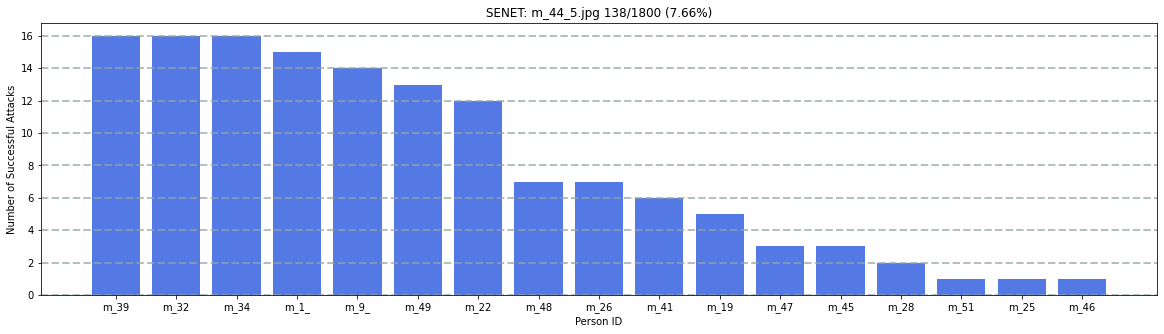

In [ ]:
#ลบตัวที่เป็น 0 ออก
senet_far1stAttackWho_sorted_NoZero = []
for i in range(len(senet_far1stAttackWho_sorted)):
  if senet_far1stAttackWho_sorted[i][1] != 0:
    senet_far1stAttackWho_sorted_NoZero.append(senet_far1stAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*senet_far1stAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('SENET: m_44_5.jpg 138/1800 (7.66%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#SENET รูป w_16_9.jpg จำนวน 133/1800 (7.388888888888889 %) 
senet_far2ndAttackWho_sorted

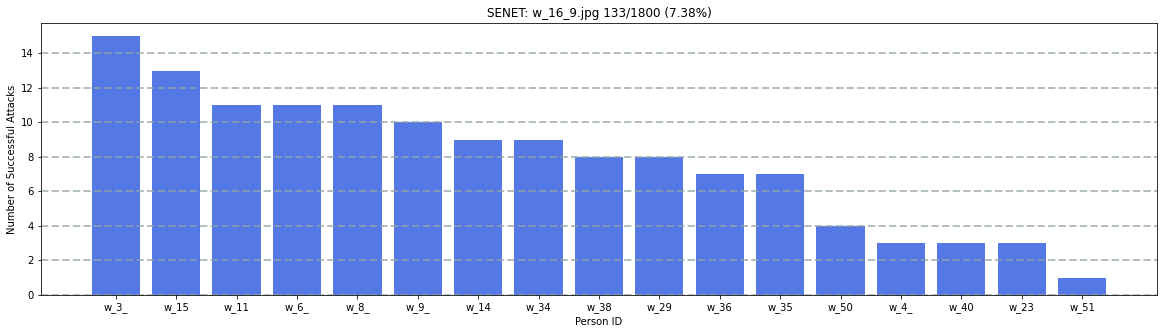

In [ ]:
#ลบตัวที่เป็น 0 ออก
senet_far2ndAttackWho_sorted_NoZero = []
for i in range(len(senet_far2ndAttackWho_sorted)):
  if senet_far2ndAttackWho_sorted[i][1] != 0:
    senet_far2ndAttackWho_sorted_NoZero.append(senet_far2ndAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*senet_far2ndAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('SENET: w_16_9.jpg 133/1800 (7.38%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#SENET รูป m_44_4.jpg จำนวน 131/1800 (7.277777777777778 %) 
senet_far3rdAttackWho_sorted

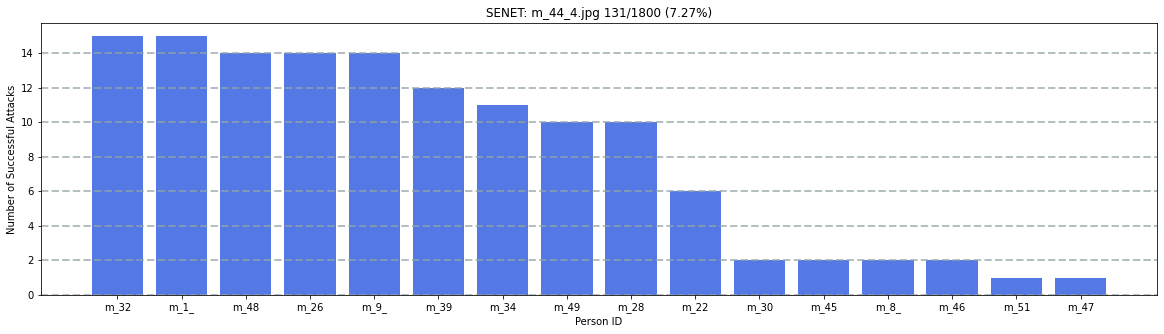

In [ ]:
#ลบตัวที่เป็น 0 ออก
senet_far3rdAttackWho_sorted_NoZero = []
for i in range(len(senet_far3rdAttackWho_sorted)):
  if senet_far3rdAttackWho_sorted[i][1] != 0:
    senet_far3rdAttackWho_sorted_NoZero.append(senet_far3rdAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*senet_far3rdAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('SENET: m_44_4.jpg 131/1800 (7.27%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#SENET รูป w_29_15.jpg จำนวน 120/1800 (6.666666666666667 %) 
senet_far4thAttackWho_sorted

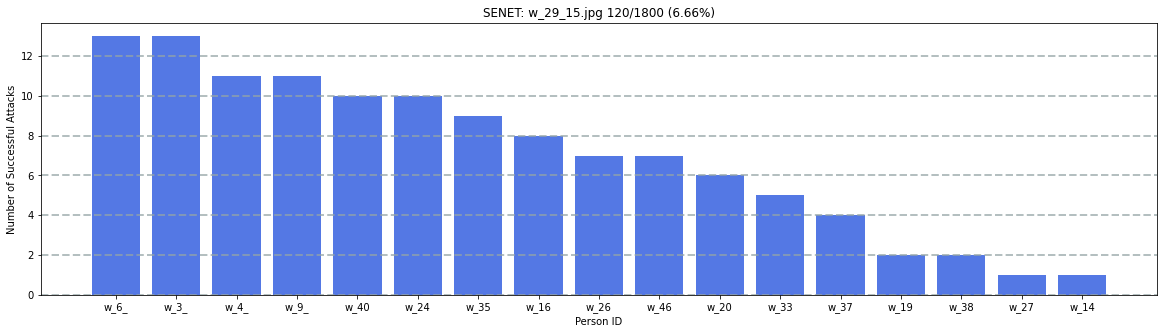

In [ ]:
#ลบตัวที่เป็น 0 ออก
senet_far4thAttackWho_sorted_NoZero = []
for i in range(len(senet_far4thAttackWho_sorted)):
  if senet_far4thAttackWho_sorted[i][1] != 0:
    senet_far4thAttackWho_sorted_NoZero.append(senet_far4thAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*senet_far4thAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('SENET: w_29_15.jpg 120/1800 (6.66%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#SENET รูป w_16_8.jpg จำนวน 115/1800 (6.388888888888888 %)
senet_far5thAttackWho_sorted

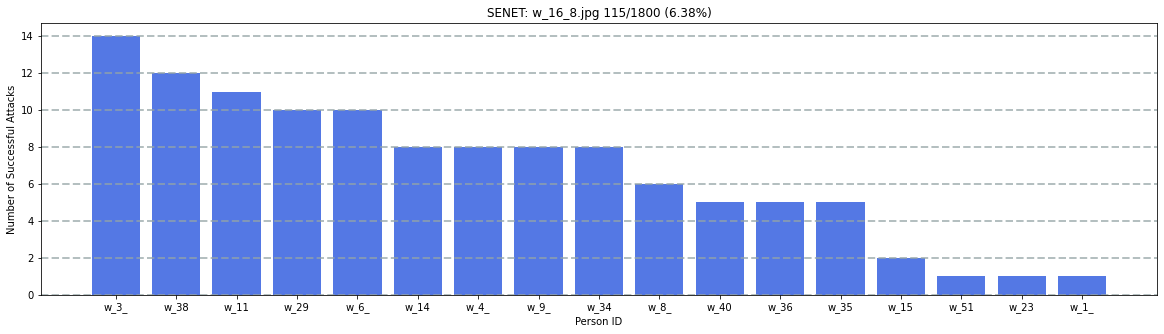

In [ ]:
#ลบตัวที่เป็น 0 ออก
senet_far5thAttackWho_sorted_NoZero = []
for i in range(len(senet_far5thAttackWho_sorted)):
  if senet_far5thAttackWho_sorted[i][1] != 0:
    senet_far5thAttackWho_sorted_NoZero.append(senet_far5thAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*senet_far5thAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('SENET: w_16_8.jpg 115/1800 (6.38%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

### บุคคลที่ถูกโจมตีบ่อยที่สุดบน RESNET

In [ ]:
#RESNET รูป w_16_7.jpg จำนวน 212/1800 (11.777777777777777 %) 
resnet_far1stAttackWho_sorted

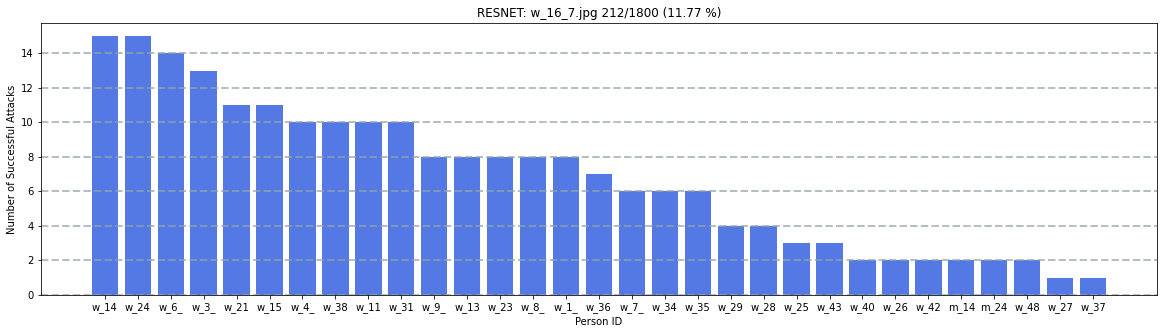

In [ ]:
#ลบตัวที่เป็น 0 ออก
resnet_far1stAttackWho_sorted_NoZero = []
for i in range(len(resnet_far1stAttackWho_sorted)):
  if resnet_far1stAttackWho_sorted[i][1] != 0:
    resnet_far1stAttackWho_sorted_NoZero.append(resnet_far1stAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*resnet_far1stAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('RESNET: w_16_7.jpg 212/1800 (11.77 %)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#RESNET รูป w_6_17.jpg จำนวน 207/1800 (11.5 %) 
resnet_far2ndAttackWho_sorted

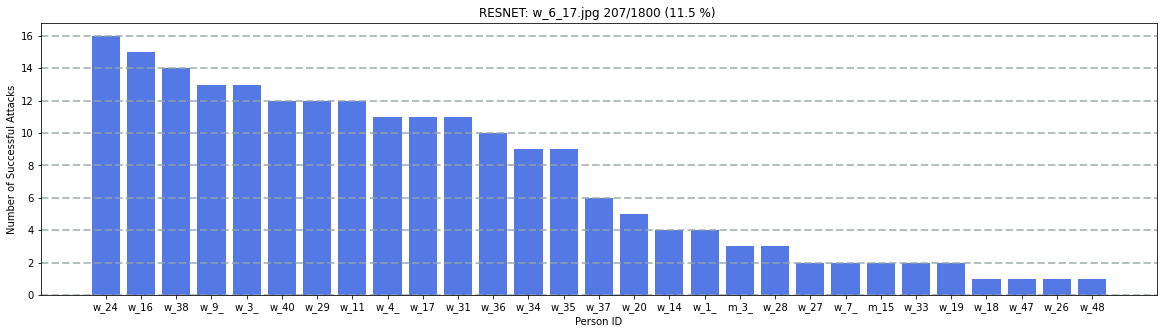

In [ ]:
#ลบตัวที่เป็น 0 ออก
resnet_far2ndAttackWho_sorted_NoZero = []
for i in range(len(resnet_far2ndAttackWho_sorted)):
  if resnet_far2ndAttackWho_sorted[i][1] != 0:
    resnet_far2ndAttackWho_sorted_NoZero.append(resnet_far2ndAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*resnet_far2ndAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('RESNET: w_6_17.jpg 207/1800 (11.5 %) ')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#RESNET รูป w_3_15.jpg จำนวน 184/1800 (10.222222222222223 %) 
resnet_far3rdAttackWho_sorted

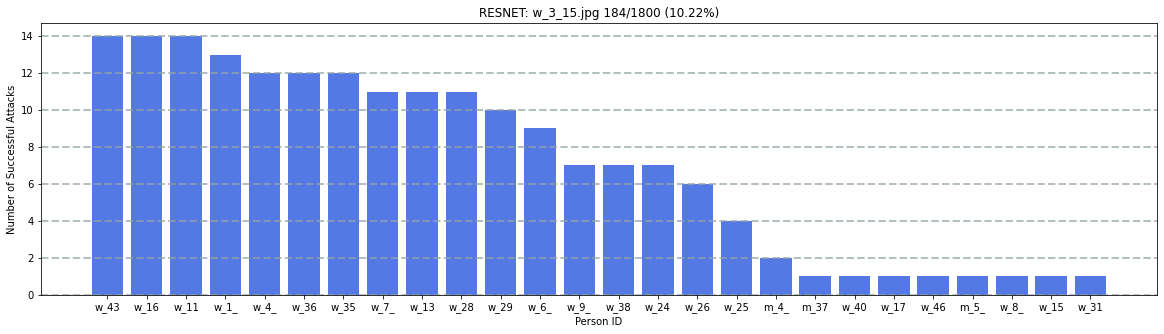

In [ ]:
#ลบตัวที่เป็น 0 ออก
resnet_far3rdAttackWho_sorted_NoZero = []
for i in range(len(resnet_far3rdAttackWho_sorted)):
  if resnet_far3rdAttackWho_sorted[i][1] != 0:
    resnet_far3rdAttackWho_sorted_NoZero.append(resnet_far3rdAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*resnet_far3rdAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('RESNET: w_3_15.jpg 184/1800 (10.22%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#RESNET รูป w_16_8.jpg จำนวน 181/1800 (10.055555555555555 %) 
resnet_far4thAttackWho_sorted

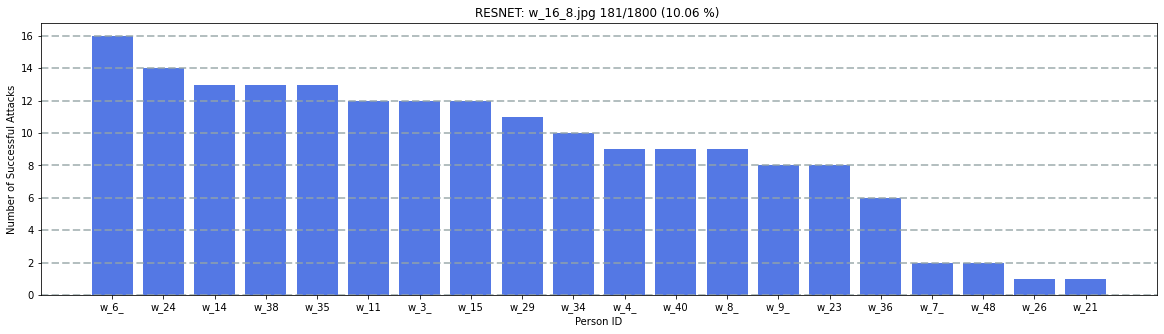

In [ ]:
#ลบตัวที่เป็น 0 ออก
resnet_far4thAttackWho_sorted_NoZero = []
for i in range(len(resnet_far4thAttackWho_sorted)):
  if resnet_far4thAttackWho_sorted[i][1] != 0:
    resnet_far4thAttackWho_sorted_NoZero.append(resnet_far4thAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*resnet_far4thAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('RESNET: w_16_8.jpg 181/1800 (10.06 %) ')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

In [ ]:
#RESNET รูป w_6_3.jpg จำนวน 181/1800 (10.055555555555555 %)
resnet_far5thAttackWho_sorted

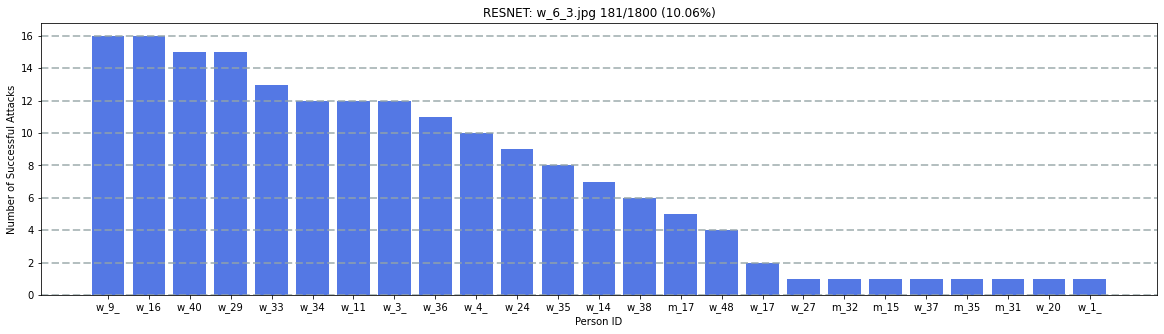

In [ ]:
#ลบตัวที่เป็น 0 ออก
resnet_far5thAttackWho_sorted_NoZero = []
for i in range(len(resnet_far5thAttackWho_sorted)):
  if resnet_far5thAttackWho_sorted[i][1] != 0:
    resnet_far5thAttackWho_sorted_NoZero.append(resnet_far5thAttackWho_sorted[i])

#แยกข้อมูลออกเป็น 2 list เพื่อนำไปพอตกราฟ
data_x, data_y = zip(*resnet_far5thAttackWho_sorted_NoZero)

#พอตกราฟ
plt.figure(figsize=(20, 5))
plt.bar(data_x, data_y, color='royalblue', alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('RESNET: w_6_3.jpg 181/1800 (10.06%)')
plt.xlabel('Person ID')
plt.ylabel('Number of Successful Attacks')
plt.show()

#Bias Male | Female

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

##RESNET - FRR

FRR = Genuine 

FAR = Imposter

In [ ]:
resnet_frr_matric = pd.read_csv(path+'/resnet_frr_matric.csv')

In [ ]:
resnet_frr_matric

,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,m_14_9.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,NaN,0.663740,0.595527,0.806172,0.938205,0.915171,0.838217,0.885213,0.945617,0.915628,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.663740,NaN,0.663696,0.780444,0.621394,0.639982,0.736802,0.628381,0.647677,0.647916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.595527,0.663696,NaN,0.750152,0.563282,0.604204,0.750588,0.546259,0.586745,0.577791,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.806172,0.780444,0.750152,NaN,0.757614,0.752647,0.885247,0.784955,0.784532,0.807960,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.938205,0.621394,0.563282,0.757614,NaN,0.933766,0.814176,0.811416,0.953846,0.862513,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.926477,0.797167,0.857425,0.883176,0.948721,NaN,0.800554,0.840808,0.802561,0.872958
1796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.817132,0.770401,0.799775,0.780933,0.803892,0.800554,NaN,0.801814,0.668194,0.793140
1797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.860572,0.807027,0.832628,0.885728,0.848317,0.840808,0.801814,NaN,0.738751,0.865782
1798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.807356,0.800494,0.803159,0.799042,0.790015,0.802561,0.668194,0.738751,NaN,0.756467


In [ ]:
resnet_frr_matric_male = resnet_frr_matric.copy(deep=True)
for i in resnet_frr_matric_male:
  #print(i.split('/')[-1])
  if "w" in i.split('/')[-1]:
    resnet_frr_matric_male.drop(i , axis=1, inplace=True)

In [ ]:
resnet_frr_matric_male

,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,m_14_9.jpg,...,m_7_8.jpg,m_7_11.jpg,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_15.jpg,m_7_16.jpg,m_7_14.jpg,m_7_17.jpg
0,NaN,0.663740,0.595527,0.806172,0.938205,0.915171,0.838217,0.885213,0.945617,0.915628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.663740,NaN,0.663696,0.780444,0.621394,0.639982,0.736802,0.628381,0.647677,0.647916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.595527,0.663696,NaN,0.750152,0.563282,0.604204,0.750588,0.546259,0.586745,0.577791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.806172,0.780444,0.750152,NaN,0.757614,0.752647,0.885247,0.784955,0.784532,0.807960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.938205,0.621394,0.563282,0.757614,NaN,0.933766,0.814176,0.811416,0.953846,0.862513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
resnet_frr_matric_female = resnet_frr_matric.copy(deep=True)
for i in resnet_frr_matric_female:
  #print(i.split('/')[-1])
  if "m" in i.split('/')[-1]:
    resnet_frr_matric_female.drop(i , axis=1, inplace=True)

In [ ]:
resnet_frr_matric_female

,w_11_1.jpg,w_11_2.jpg,w_11_3.jpg,w_11_5.jpg,w_11_4.jpg,w_11_6.jpg,w_11_7.jpg,w_11_9.jpg,w_11_8.jpg,w_11_10.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.926477,0.797167,0.857425,0.883176,0.948721,NaN,0.800554,0.840808,0.802561,0.872958
1796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.817132,0.770401,0.799775,0.780933,0.803892,0.800554,NaN,0.801814,0.668194,0.793140
1797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.860572,0.807027,0.832628,0.885728,0.848317,0.840808,0.801814,NaN,0.738751,0.865782
1798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.807356,0.800494,0.803159,0.799042,0.790015,0.802561,0.668194,0.738751,NaN,0.756467


In [ ]:
resnet_frr_matric_female = resnet_frr_matric_female.fillna(0)

In [ ]:
resnet_frr_matric_male = resnet_frr_matric_male.fillna(0)

In [ ]:
resnet_frr_matric_female = resnet_frr_matric_female.values.tolist()

In [ ]:
resnet_frr_matric_male = resnet_frr_matric_male.values.tolist()

In [ ]:
import itertools
resnet_frr_matric_female_1d = list(itertools.chain(*resnet_frr_matric_female))

In [ ]:
import itertools
resnet_frr_matric_male_1d = list(itertools.chain(*resnet_frr_matric_male))

In [ ]:
resnet_Genuine_Male = pd.DataFrame(
    {'Male': resnet_frr_matric_male_1d,
     #'Genuine_Female': resnet_frr_matric_female_1d,
    })

In [ ]:
resnet_Genuine_Female = pd.DataFrame(
    {#'Genuine_Male': resnet_frr_matric_male_1d,
     'Female': resnet_frr_matric_female_1d,
    })

In [ ]:
resnet_Genuine_Male = resnet_Genuine_Male.loc[~(resnet_Genuine_Male==0).all(axis=1)]
resnet_Genuine_Female = resnet_Genuine_Female.loc[~(resnet_Genuine_Female==0).all(axis=1)]

In [ ]:
resnet_Genuine_Male

,Male
1,0.663740
2,0.595527
3,0.806172
4,0.938205
5,0.915171
...,...
945634,0.920306
945635,0.941645
945636,0.898342
945637,0.911802


In [ ]:
resnet_Genuine_Female

,Female
764541,0.805392
764542,0.968544
764543,0.908205
764544,0.894292
764545,0.927196
...,...
1547994,0.881329
1547995,0.872958
1547996,0.793140
1547997,0.865782


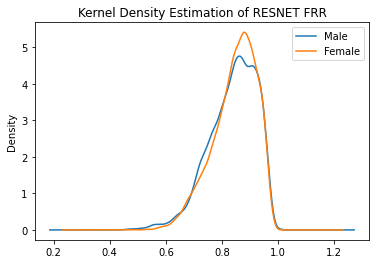

In [ ]:
ax = resnet_Genuine_Male.plot.kde(title="Kernel Density Estimation of RESNET FRR");
resnet_Genuine_Female.plot.kde(title="Kernel Density Estimation of RESNET FRR", ax=ax);

In [ ]:
#resnet_Genuine_Female.plot.kde(bw_method=1, title="PDF using Kernel Density Estimation - Bandwidth value=1", ax=ax);

In [ ]:
#คำนวณหาความแตกต่าง
data1 = resnet_Genuine_Male.to_numpy().flatten()
data2 = resnet_Genuine_Female.to_numpy().flatten()
stats.ks_2samp(data1, data2, alternative='two-sided', mode='auto')

Ks_2sampResult(statistic=0.04310284223046745, pvalue=6.629681044559695e-12)

##RESNET - FAR

In [ ]:
resnet_far_matric = pd.read_csv(path+'/resnet_far_matric.csv')
resnet_far_matric

,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,m_14_9.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.417363,0.445557,0.427380,0.443410,0.426408,0.394447,0.339149,0.402136,0.433510,0.358837
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.374828,0.423396,0.386984,0.401074,0.370849,0.350163,0.325469,0.360708,0.363284,0.325769
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.359508,0.375124,0.347746,0.380207,0.362734,0.338510,0.325136,0.335294,0.341702,0.341927
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.444753,0.487842,0.458839,0.505382,0.453166,0.416121,0.398387,0.459037,0.415871,0.413622
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.460723,0.438742,0.427562,0.461459,0.458205,0.438303,0.362588,0.426528,0.439079,0.373677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.394447,0.350163,0.338510,0.416121,0.438303,0.422697,0.441092,0.375946,0.421928,0.379749,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
1796,0.339149,0.325469,0.325136,0.398387,0.362588,0.355075,0.395779,0.335464,0.358474,0.352742,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1797,0.402136,0.360708,0.335294,0.459037,0.426528,0.383442,0.422658,0.439123,0.440592,0.446827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1798,0.433510,0.363284,0.341702,0.415871,0.439079,0.426461,0.417550,0.429022,0.435084,0.424602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [ ]:
resnet_far_matric_male = resnet_far_matric.copy(deep=True)
for i in resnet_far_matric_male:
  #print(i.split('/')[-1])
  if "w" in i.split('/')[-1]:
    resnet_far_matric_male.drop(i , axis=1, inplace=True)

In [ ]:
resnet_far_matric_male

,m_14_1.jpg,m_14_2.jpg,m_14_3.jpg,m_14_4.jpg,m_14_7.jpg,m_14_6.jpg,m_14_5.jpg,m_14_11.jpg,m_14_8.jpg,m_14_9.jpg,...,m_7_8.jpg,m_7_11.jpg,m_7_9.jpg,m_7_10.jpg,m_7_13.jpg,m_7_12.jpg,m_7_15.jpg,m_7_16.jpg,m_7_14.jpg,m_7_17.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.413859,0.402052,0.387999,0.357866,0.364862,0.362304,0.353626,0.408609,0.367291,0.329569
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.357908,0.356519,0.362818,0.336677,0.338086,0.329790,0.344024,0.352699,0.343715,0.316262
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.334209,0.334360,0.324997,0.314021,0.332454,0.326143,0.315669,0.349637,0.304895,0.288736
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.411330,0.412692,0.408418,0.390866,0.389160,0.379271,0.375858,0.424790,0.374874,0.355841
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.412835,0.407368,0.404378,0.363577,0.368590,0.365544,0.372433,0.399518,0.365558,0.333897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.394447,0.350163,0.338510,0.416121,0.438303,0.422697,0.441092,0.375946,0.421928,0.379749,...,0.369112,0.384061,0.403815,0.394539,0.380533,0.378331,0.424331,0.392640,0.366459,0.386668
1796,0.339149,0.325469,0.325136,0.398387,0.362588,0.355075,0.395779,0.335464,0.358474,0.352742,...,0.349464,0.355200,0.366316,0.378768,0.358690,0.358708,0.382383,0.366609,0.359245,0.364983
1797,0.402136,0.360708,0.335294,0.459037,0.426528,0.383442,0.422658,0.439123,0.440592,0.446827,...,0.378067,0.402420,0.413548,0.419037,0.370297,0.376468,0.388991,0.430923,0.368167,0.401210
1798,0.433510,0.363284,0.341702,0.415871,0.439079,0.426461,0.417550,0.429022,0.435084,0.424602,...,0.358889,0.361413,0.375250,0.365725,0.331655,0.331189,0.359955,0.351819,0.335644,0.335178


In [ ]:
resnet_far_matric_female = resnet_far_matric.copy(deep=True)
for i in resnet_far_matric_female:
  #print(i.split('/')[-1])
  if "m" in i.split('/')[-1]:
    resnet_far_matric_female.drop(i , axis=1, inplace=True)

In [ ]:
resnet_far_matric_female

,w_11_1.jpg,w_11_2.jpg,w_11_3.jpg,w_11_5.jpg,w_11_4.jpg,w_11_6.jpg,w_11_7.jpg,w_11_9.jpg,w_11_8.jpg,w_11_10.jpg,...,w_7_6.jpg,w_7_9.jpg,w_7_10.jpg,w_7_11.jpg,w_7_12.jpg,w_7_13.jpg,w_7_14.jpg,w_7_16.jpg,w_7_15.jpg,w_7_17.jpg
0,0.532261,0.529325,0.528931,0.488738,0.525464,0.543262,0.524291,0.503256,0.526474,0.507807,...,0.417363,0.445557,0.427380,0.443410,0.426408,0.394447,0.339149,0.402136,0.433510,0.358837
1,0.465412,0.517669,0.445015,0.472969,0.484545,0.446389,0.425409,0.432063,0.424220,0.448033,...,0.374828,0.423396,0.386984,0.401074,0.370849,0.350163,0.325469,0.360708,0.363284,0.325769
2,0.477205,0.483616,0.464439,0.513931,0.524579,0.495404,0.483961,0.469088,0.488877,0.492264,...,0.359508,0.375124,0.347746,0.380207,0.362734,0.338510,0.325136,0.335294,0.341702,0.341927
3,0.589723,0.566256,0.555966,0.597880,0.607049,0.586248,0.552673,0.545909,0.561431,0.550952,...,0.444753,0.487842,0.458839,0.505382,0.453166,0.416121,0.398387,0.459037,0.415871,0.413622
4,0.541198,0.532251,0.531676,0.508026,0.542842,0.570998,0.551103,0.513481,0.542206,0.494341,...,0.460723,0.438742,0.427562,0.461459,0.458205,0.438303,0.362588,0.426528,0.439079,0.373677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.518889,0.481273,0.499743,0.535522,0.566809,0.601806,0.566295,0.510944,0.490347,0.457234,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
1796,0.428586,0.376411,0.418651,0.442310,0.453429,0.489231,0.455875,0.434333,0.448280,0.413640,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1797,0.576106,0.551457,0.574893,0.588788,0.613270,0.628931,0.606825,0.599807,0.585583,0.553726,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1798,0.523893,0.529736,0.536095,0.540851,0.538896,0.556843,0.543740,0.537282,0.498589,0.489821,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [ ]:
resnet_far_matric_female = resnet_far_matric_female.fillna(0)
resnet_far_matric_male = resnet_far_matric_male.fillna(0)
resnet_far_matric_female = resnet_far_matric_female.values.tolist()
resnet_far_matric_male = resnet_far_matric_male.values.tolist()

In [ ]:
import itertools
resnet_far_matric_female_1d = list(itertools.chain(*resnet_far_matric_female))
resnet_far_matric_male_1d = list(itertools.chain(*resnet_far_matric_male))

In [ ]:
resnet_Imposter_Male = pd.DataFrame(
    {'Male': resnet_far_matric_male_1d,
     #'Imposter_Female': resnet_far_matric_female_1d,
    })
resnet_Imposter_Female = pd.DataFrame(
    {#'Imposter_Male': resnet_far_matric_male_1d,
     'Female': resnet_far_matric_female_1d,
    })

In [ ]:
resnet_Imposter_Male = resnet_Imposter_Male.loc[~(resnet_Imposter_Male==0).all(axis=1)]
resnet_Imposter_Female = resnet_Imposter_Female.loc[~(resnet_Imposter_Female==0).all(axis=1)]

In [ ]:
resnet_Imposter_Male

,Male
17,0.555866
18,0.556174
19,0.489291
20,0.506520
21,0.486669
...,...
1691995,0.357388
1691996,0.369125
1691997,0.388015
1691998,0.349686


In [ ]:
resnet_Imposter_Female

,Female
0,0.532261
1,0.529325
2,0.528931
3,0.488738
4,0.525464
...,...
1547978,0.360200
1547979,0.355663
1547980,0.351454
1547981,0.351509


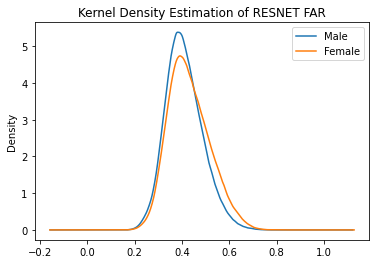

In [ ]:
ax = resnet_Imposter_Male.plot.kde(title="Kernel Density Estimation of RESNET FAR");
resnet_Imposter_Female.plot.kde(title="Kernel Density Estimation of RESNET FAR", ax=ax);

In [ ]:
#คำนวณหาความแตกต่าง
data1 = resnet_Imposter_Male.to_numpy().flatten()
data2 = resnet_Imposter_Female.to_numpy().flatten()
stats.ks_2samp(data1, data2, alternative='two-sided', mode='auto')

Ks_2sampResult(statistic=0.09721807147883033, pvalue=0.0)

##SENET - FRR

In [ ]:
senet_frr_matric = pd.read_csv(path+'/senet_frr_matric.csv')
senet_frr_matric

,w_44_1.jpg,w_44_2.jpg,w_44_3.jpg,w_44_4.jpg,w_44_5.jpg,w_44_6.jpg,w_44_7.jpg,w_44_8.jpg,w_44_9.jpg,w_44_10.jpg,...,w_48_8.jpg,w_48_9.jpg,w_48_10.jpg,w_48_11.jpg,w_48_12.jpg,w_48_13.jpg,w_48_14.jpg,w_48_15.jpg,w_48_16.jpg,w_48_17.jpg
0,NaN,0.813671,0.954784,0.845253,0.810591,0.939225,0.953461,0.954149,0.944385,0.941085,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.813671,NaN,0.790624,0.846506,0.844687,0.793284,0.809888,0.821877,0.849840,0.826825,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.954784,0.790624,NaN,0.858581,0.817226,0.926579,0.899936,0.914409,0.893045,0.904586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.845253,0.846506,0.858581,NaN,0.943164,0.836932,0.841108,0.880692,0.870217,0.855979,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.810591,0.844687,0.817226,0.943164,NaN,0.790182,0.823147,0.853832,0.864467,0.837364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.898373,0.873422,0.876600,0.887765,0.948370,NaN,0.873708,0.831030,0.844488,0.816069
1796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.860879,0.899289,0.889858,0.860409,0.881087,0.873708,NaN,0.804246,0.869013,0.870511
1797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.853608,0.882070,0.866861,0.833850,0.855697,0.831030,0.804246,NaN,0.868268,0.798840
1798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.897796,0.947307,0.938661,0.905625,0.886061,0.844488,0.869013,0.868268,NaN,0.867279


In [ ]:
senet_frr_matric_male = senet_frr_matric.copy(deep=True)
for i in senet_frr_matric_male:
  #print(i.split('/')[-1])
  if "w" in i.split('/')[-1]:
    senet_frr_matric_male.drop(i , axis=1, inplace=True)

In [ ]:
senet_frr_matric_male

,m_54_1.jpg,m_54_2.jpg,m_54_3.jpg,m_54_4.jpg,m_54_5.jpg,m_54_6.jpg,m_54_7.jpg,m_54_8.jpg,m_54_9.jpg,m_54_10.jpg,...,m_28_8.jpg,m_28_9.jpg,m_28_10.jpg,m_28_11.jpg,m_28_12.jpg,m_28_13.jpg,m_28_14.jpg,m_28_15.jpg,m_28_16.jpg,m_28_17.jpg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
senet_frr_matric_female = senet_frr_matric.copy(deep=True)
for i in senet_frr_matric_female:
  #print(i.split('/')[-1])
  if "m" in i.split('/')[-1]:
    senet_frr_matric_female.drop(i , axis=1, inplace=True)

In [ ]:
senet_frr_matric_female

,w_44_1.jpg,w_44_2.jpg,w_44_3.jpg,w_44_4.jpg,w_44_5.jpg,w_44_6.jpg,w_44_7.jpg,w_44_8.jpg,w_44_9.jpg,w_44_10.jpg,...,w_48_8.jpg,w_48_9.jpg,w_48_10.jpg,w_48_11.jpg,w_48_12.jpg,w_48_13.jpg,w_48_14.jpg,w_48_15.jpg,w_48_16.jpg,w_48_17.jpg
0,NaN,0.813671,0.954784,0.845253,0.810591,0.939225,0.953461,0.954149,0.944385,0.941085,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.813671,NaN,0.790624,0.846506,0.844687,0.793284,0.809888,0.821877,0.849840,0.826825,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.954784,0.790624,NaN,0.858581,0.817226,0.926579,0.899936,0.914409,0.893045,0.904586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.845253,0.846506,0.858581,NaN,0.943164,0.836932,0.841108,0.880692,0.870217,0.855979,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.810591,0.844687,0.817226,0.943164,NaN,0.790182,0.823147,0.853832,0.864467,0.837364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.898373,0.873422,0.876600,0.887765,0.948370,NaN,0.873708,0.831030,0.844488,0.816069
1796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.860879,0.899289,0.889858,0.860409,0.881087,0.873708,NaN,0.804246,0.869013,0.870511
1797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.853608,0.882070,0.866861,0.833850,0.855697,0.831030,0.804246,NaN,0.868268,0.798840
1798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.897796,0.947307,0.938661,0.905625,0.886061,0.844488,0.869013,0.868268,NaN,0.867279


In [ ]:
senet_frr_matric_female = senet_frr_matric_female.fillna(0)
senet_frr_matric_male = senet_frr_matric_male.fillna(0)
senet_frr_matric_female = senet_frr_matric_female.values.tolist()
senet_frr_matric_male = senet_frr_matric_male.values.tolist()

In [ ]:
import itertools
senet_frr_matric_female_1d = list(itertools.chain(*senet_frr_matric_female))
senet_frr_matric_male_1d = list(itertools.chain(*senet_frr_matric_male))

In [ ]:
senet_Genuine_Male = pd.DataFrame(
    {'Male': senet_frr_matric_male_1d,
     #'Genuine_Female': resnet_far_matric_female_1d,
    })
senet_Genuine_Female = pd.DataFrame(
    {#'Genuine_Male': resnet_far_matric_male_1d,
     'Female': senet_frr_matric_female_1d,
    })

In [ ]:
senet_Genuine_Male = senet_Genuine_Male.loc[~(senet_Genuine_Male==0).all(axis=1)]
senet_Genuine_Female = senet_Genuine_Female.loc[~(senet_Genuine_Female==0).all(axis=1)]

In [ ]:
senet_Genuine_Male

,Male
15981,0.771698
15982,0.896800
15983,0.845544
15984,0.868293
15985,0.924340
...,...
1660034,0.915783
1660035,0.904457
1660036,0.939774
1660037,0.919490


In [ ]:
senet_Genuine_Female

,Female
1,0.813671
2,0.954784
3,0.845253
4,0.810591
5,0.939225
...,...
1547994,0.861007
1547995,0.816069
1547996,0.870511
1547997,0.798840


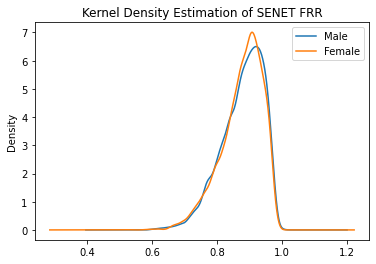

In [ ]:
ax = senet_Genuine_Male.plot.kde(title="Kernel Density Estimation of SENET FRR");
senet_Genuine_Female.plot.kde(title="Kernel Density Estimation of SENET FRR", ax=ax);

In [ ]:
#คำนวณหาความแตกต่าง
data1 = senet_Genuine_Male.to_numpy().flatten()
data2 = senet_Genuine_Female.to_numpy().flatten()
stats.ks_2samp(data1, data2, alternative='two-sided', mode='auto')

Ks_2sampResult(statistic=0.028850266588554163, pvalue=1.4390664772572408e-05)

##SENET - FAR

In [ ]:
senet_far_matric = pd.read_csv(path+'/senet_far_matric.csv')
senet_far_matric

,w_44_1.jpg,w_44_2.jpg,w_44_3.jpg,w_44_4.jpg,w_44_5.jpg,w_44_6.jpg,w_44_7.jpg,w_44_8.jpg,w_44_9.jpg,w_44_10.jpg,...,w_48_8.jpg,w_48_9.jpg,w_48_10.jpg,w_48_11.jpg,w_48_12.jpg,w_48_13.jpg,w_48_14.jpg,w_48_15.jpg,w_48_16.jpg,w_48_17.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.457726,0.419312,0.424351,0.394397,0.457388,0.497818,0.429727,0.457562,0.404103,0.430994
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.412056,0.390637,0.401149,0.376300,0.420561,0.438675,0.398425,0.368272,0.389472,0.411741
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.474934,0.433418,0.434243,0.404950,0.468972,0.524129,0.451245,0.459809,0.419660,0.428084
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.487299,0.438628,0.444998,0.427940,0.477924,0.507787,0.452325,0.439822,0.425065,0.442698
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.481883,0.448356,0.445715,0.425130,0.460482,0.481614,0.448553,0.419616,0.426810,0.442280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.497818,0.438675,0.524129,0.507787,0.481614,0.509815,0.482473,0.525385,0.505147,0.516861,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
1796,0.429727,0.398425,0.451245,0.452325,0.448553,0.458515,0.432814,0.449808,0.435292,0.455753,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1797,0.457562,0.368272,0.459809,0.439822,0.419616,0.462209,0.456253,0.485432,0.472785,0.486410,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1798,0.404103,0.389472,0.419660,0.425065,0.426810,0.422541,0.408857,0.434879,0.419174,0.432557,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [ ]:
senet_far_matric_male = senet_far_matric.copy(deep=True)
for i in senet_far_matric_male:
  #print(i.split('/')[-1])
  if "w" in i.split('/')[-1]:
    senet_far_matric_male.drop(i , axis=1, inplace=True)

In [ ]:
senet_far_matric_male

,m_54_1.jpg,m_54_2.jpg,m_54_3.jpg,m_54_4.jpg,m_54_5.jpg,m_54_6.jpg,m_54_7.jpg,m_54_8.jpg,m_54_9.jpg,m_54_10.jpg,...,m_28_8.jpg,m_28_9.jpg,m_28_10.jpg,m_28_11.jpg,m_28_12.jpg,m_28_13.jpg,m_28_14.jpg,m_28_15.jpg,m_28_16.jpg,m_28_17.jpg
0,0.348608,0.323237,0.391333,0.362652,0.400506,0.393316,0.366998,0.373443,0.346052,0.340801,...,0.347399,0.368095,0.385543,0.354280,0.359769,0.381051,0.358945,0.370021,0.378608,0.361717
1,0.406743,0.412964,0.411369,0.378184,0.422896,0.398573,0.416751,0.442436,0.405991,0.411900,...,0.373994,0.385102,0.378874,0.371041,0.365407,0.372182,0.357991,0.363147,0.383148,0.361697
2,0.323087,0.299072,0.376561,0.354849,0.384564,0.355508,0.333629,0.346495,0.323218,0.317532,...,0.335365,0.354752,0.371441,0.343224,0.339032,0.349332,0.354018,0.349637,0.377284,0.348905
3,0.345610,0.336411,0.357190,0.374617,0.407189,0.354382,0.358728,0.381780,0.351810,0.344247,...,0.402646,0.411373,0.415127,0.405838,0.391859,0.394437,0.399599,0.404597,0.419293,0.401929
4,0.349052,0.337334,0.366183,0.361382,0.413649,0.341412,0.354788,0.371769,0.350687,0.360865,...,0.421011,0.434837,0.437550,0.419478,0.401586,0.409603,0.413409,0.408191,0.405086,0.407074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.431180,0.330041,0.449533,0.459875,0.474792,0.425203,0.429096,0.447644,0.441034,0.410781,...,0.353642,0.373651,0.382227,0.383690,0.361641,0.344175,0.368973,0.382796,0.334759,0.367252
1796,0.450127,0.359871,0.474260,0.492629,0.522263,0.432059,0.431654,0.450104,0.458510,0.436396,...,0.361997,0.383736,0.378734,0.375284,0.350373,0.353117,0.375850,0.376563,0.342722,0.368487
1797,0.399620,0.290378,0.418804,0.423461,0.448495,0.397053,0.403485,0.396261,0.396346,0.380219,...,0.332301,0.344200,0.362220,0.354291,0.333042,0.330102,0.323386,0.340776,0.288223,0.334608
1798,0.436089,0.350748,0.446649,0.433852,0.477166,0.399203,0.414679,0.442107,0.442073,0.417901,...,0.335253,0.354149,0.365574,0.350144,0.327107,0.312949,0.336683,0.332926,0.317603,0.346076


In [ ]:
senet_far_matric_female = senet_far_matric.copy(deep=True)
for i in senet_far_matric_female:
  #print(i.split('/')[-1])
  if "m" in i.split('/')[-1]:
    senet_far_matric_female.drop(i , axis=1, inplace=True)

In [ ]:
senet_far_matric_female

,w_44_1.jpg,w_44_2.jpg,w_44_3.jpg,w_44_4.jpg,w_44_5.jpg,w_44_6.jpg,w_44_7.jpg,w_44_8.jpg,w_44_9.jpg,w_44_10.jpg,...,w_48_8.jpg,w_48_9.jpg,w_48_10.jpg,w_48_11.jpg,w_48_12.jpg,w_48_13.jpg,w_48_14.jpg,w_48_15.jpg,w_48_16.jpg,w_48_17.jpg
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.457726,0.419312,0.424351,0.394397,0.457388,0.497818,0.429727,0.457562,0.404103,0.430994
1,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.412056,0.390637,0.401149,0.376300,0.420561,0.438675,0.398425,0.368272,0.389472,0.411741
2,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.474934,0.433418,0.434243,0.404950,0.468972,0.524129,0.451245,0.459809,0.419660,0.428084
3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.487299,0.438628,0.444998,0.427940,0.477924,0.507787,0.452325,0.439822,0.425065,0.442698
4,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.481883,0.448356,0.445715,0.425130,0.460482,0.481614,0.448553,0.419616,0.426810,0.442280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.497818,0.438675,0.524129,0.507787,0.481614,0.509815,0.482473,0.525385,0.505147,0.516861,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
1796,0.429727,0.398425,0.451245,0.452325,0.448553,0.458515,0.432814,0.449808,0.435292,0.455753,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1797,0.457562,0.368272,0.459809,0.439822,0.419616,0.462209,0.456253,0.485432,0.472785,0.486410,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
1798,0.404103,0.389472,0.419660,0.425065,0.426810,0.422541,0.408857,0.434879,0.419174,0.432557,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [ ]:
senet_far_matric_female = senet_far_matric_female.fillna(0)
senet_far_matric_male = senet_far_matric_male.fillna(0)
senet_far_matric_female = senet_far_matric_female.values.tolist()
senet_far_matric_male = senet_far_matric_male.values.tolist()

In [ ]:
import itertools
senet_far_matric_female_1d = list(itertools.chain(*senet_far_matric_female))
senet_far_matric_male_1d = list(itertools.chain(*senet_far_matric_male))

In [ ]:
senet_Imposter_Male = pd.DataFrame(
    {'Male': senet_far_matric_male_1d,
     #'Genuine_Female': resnet_far_matric_female_1d,
    })
senet_Imposter_Female = pd.DataFrame(
    {#'Genuine_Male': resnet_far_matric_male_1d,
     'Female': senet_far_matric_female_1d,
    })

In [ ]:
senet_Imposter_Male = senet_Imposter_Male.loc[~(senet_Imposter_Male==0).all(axis=1)]
senet_Imposter_Female = senet_Imposter_Female.loc[~(senet_Imposter_Female==0).all(axis=1)]

In [ ]:
senet_Imposter_Male

,Male
0,0.348608
1,0.323237
2,0.391333
3,0.362652
4,0.400506
...,...
1691995,0.391266
1691996,0.380616
1691997,0.392209
1691998,0.343053


In [ ]:
senet_Imposter_Female

,Female
17,0.629358
18,0.527966
19,0.628920
20,0.550135
21,0.572625
...,...
1547978,0.556410
1547979,0.521364
1547980,0.562626
1547981,0.586429


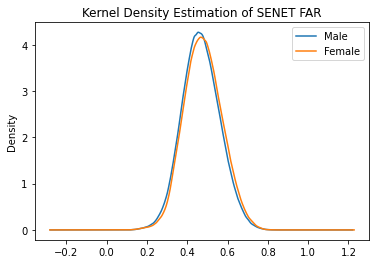

In [ ]:
ax = senet_Imposter_Male.plot.kde(title="Kernel Density Estimation of SENET FAR");
senet_Imposter_Female.plot.kde(title="Kernel Density Estimation of SENET FAR", ax=ax);

In [ ]:
#คำนวณหาความแตกต่าง
data1 = senet_Imposter_Male.to_numpy().flatten()
data2 = senet_Imposter_Female.to_numpy().flatten()
stats.ks_2samp(data1, data2, alternative='two-sided', mode='auto')

Ks_2sampResult(statistic=0.04621935105871111, pvalue=0.0)